<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/Tourism_Experiance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Title of The Project - Machine Learning–Based Tourism Experience Analytics and Recommendation System***

BY RAVADA GUNA VARDHINI

# PROJECT SUMMARY

The Tourism Experience Analytics: Classification, Prediction, and Recommendation System is a data-driven solution designed to enhance tourism services by leveraging machine learning and analytics techniques. The primary goal of this project is to analyze user travel behavior, predict user satisfaction, classify visit modes, and provide personalized attraction recommendations. With the increasing demand for customized travel experiences, tourism agencies and online travel platforms require intelligent systems that can understand customer preferences and deliver tailored travel suggestions. This project addresses that need by developing an end-to-end analytics and recommendation framework.

The project utilizes a comprehensive tourism dataset containing user demographics, transaction history, attraction details, and geographical data. The dataset includes multiple relational tables such as user information, transaction records, attraction types, city details, visit modes, and regional classifications. The initial phase of the project focused on data cleaning and preprocessing to ensure data quality and consistency. Missing values were handled appropriately, categorical inconsistencies were resolved, and date formats were standardized. Feature engineering techniques were applied to create meaningful user profiles, and categorical variables such as continent, country, visit mode, and attraction type were encoded for model compatibility. Numerical features were normalized to improve machine learning model performance.

Exploratory Data Analysis (EDA) was conducted to understand tourism trends and user behavior patterns. Various visualizations were created to analyze user distribution across continents, countries, and regions. The popularity of different attraction types was studied based on user ratings and visit frequency. Additionally, relationships between user demographics and visit modes were examined to identify travel behavior trends. These insights helped in selecting relevant features and designing predictive models effectively.

The project implements three major machine learning components: regression, classification, and recommendation. The regression model was developed to predict user ratings for tourist attractions based on historical data, attraction characteristics, and user demographic information. This helps tourism agencies estimate user satisfaction and improve service quality. The classification model predicts the user’s visit mode, such as business, family, couples, or friends, based on demographic and historical visit data. This enables travel platforms to design targeted marketing campaigns and personalized travel packages.

The recommendation system is designed to provide personalized attraction suggestions to users. Collaborative filtering techniques were used to recommend attractions based on similar user preferences and rating patterns. Content-based filtering was also implemented to suggest attractions with similar characteristics to those previously visited by the user. The recommendation system enhances user engagement by providing relevant and personalized travel suggestions.

Model performance was evaluated using appropriate metrics. The regression model was assessed using R-squared and Mean Squared Error, while the classification model was evaluated using accuracy, precision, recall, and F1-score. The recommendation system was assessed using ranking-based evaluation metrics to ensure recommendation relevance and accuracy.

To demonstrate the practical implementation of the system, a user-friendly Streamlit web application was developed. The application allows users to input their demographic and travel preferences and receive predicted visit modes and personalized attraction recommendations. The app also displays visual dashboards showing tourism trends, popular attractions, and regional travel insights.

Overall, this project demonstrates the integration of data analytics, machine learning, and web deployment to solve real-world tourism challenges. The system provides actionable business insights, improves customer experience, and supports tourism organizations in making data-driven decisions, ultimately enhancing customer satisfaction and retention.

# GITHUB LINK -

# PROBLEM STATEMENT

Tourism platforms generate large volumes of user and travel data but often fail to utilize it effectively for personalization and prediction. Existing systems lack the ability to accurately predict user satisfaction, classify travel behavior, and recommend relevant attractions. This results in generic recommendations, low user engagement, and inefficient marketing strategies. There is a need for a data-driven system that leverages analytics and machine learning to understand user behavior, predict visit modes, and provide personalized attraction recommendations to enhance customer experience and retention.

## **Let's Begin !**

## **1. Know Your Data**

## Import Libraries

In [ ]:
import pandas as pd    # Used for data loading, merging multiple datasets, cleaning, and transformation
import numpy as np     # Used for numerical operations, feature engineering, and array-based computations

# Date & Time Handling
import datetime as dt  # Used to process visit year/month and create time-based features

# Data Visualization Libraries
import matplotlib.pyplot as plt   # Used for plotting trends, distributions, and comparison charts
import seaborn as sns             # Used for advanced statistical visualizations and correlation heatmaps

# Data Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder      # Used to encode categorical variables (VisitMode, Continent, Country)
from sklearn.preprocessing import OneHotEncoder     # Used for encoding categorical features for ML models
from sklearn.preprocessing import StandardScaler    # Used to normalize numerical features for better model performance
from sklearn.model_selection import train_test_split # Used to split data into training and testing sets

# Regression Models (Rating Prediction)
from sklearn.linear_model import LinearRegression   # Used as a baseline regression model
from sklearn.ensemble import RandomForestRegressor  # Used to predict attraction ratings with higher accuracy
from sklearn.metrics import mean_squared_error, r2_score  # Used to evaluate regression model performance

# Classification Models (Visit Mode Prediction)
from sklearn.ensemble import RandomForestClassifier # Used to classify users based on visit mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Used to evaluate classification models
from sklearn.metrics import confusion_matrix, classification_report  # Used for detailed performance analysis

# Recommendation System
from sklearn.metrics.pairwise import cosine_similarity  # Used to compute similarity between users or attractions
from scipy.sparse import csr_matrix                     # Used to create user-item interaction matrix efficiently

# Dimensionality Reduction
from sklearn.decomposition import PCA   # Used to reduce feature dimensions for visualization and analysis

# Model Saving & Loading
import pickle    # Used to serialize and store trained ML models
import joblib    # Used for efficient saving and loading of large models


## Dataset Loading

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")


Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset (4).xlsx


## Dataset First View

In [ ]:
# Display first few rows
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId_from_txn,AttractionId,Rating,ContinentId,RegionId,CountryId,...,VisitMode,AttractionCityId_lookup,CityName,AttractionCountryId,Country,CountryRegionId,Region,RegionContinentId,Continent,AttractionType
0,3,70456,2022,10,2,640,5,5,21,163,...,Couples,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,2,8,48,...,Friends,1,Douala,1,Canada,8,Northern America,2,America,Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,2,9,54,...,Family,1,Douala,1,Brazil,9,South America,2,America,Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,5,17,135,...,Family,1,Douala,1,Switzerland,17,Central Europe,5,Europe,Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,5,21,163,...,Couples,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,Nature & Wildlife Areas


## Dataset Rows Count

In [ ]:
print("Number of Rows:", df.shape[0]) # prints no of Rows

Number of Rows: 52930


## Dataset Columns Count

In [ ]:
print("Number of Columns:", df.shape[1]) # prints no of colummns

Number of Columns: 26


## Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionId            52930 non-null  int64  
 1   UserId                   52930 non-null  int64  
 2   VisitYear                52930 non-null  int64  
 3   VisitMonth               52930 non-null  int64  
 4   VisitModeId_from_txn     52930 non-null  int64  
 5   AttractionId             52930 non-null  int64  
 6   Rating                   52930 non-null  int64  
 7   ContinentId              52930 non-null  int64  
 8   RegionId                 52930 non-null  int64  
 9   CountryId                52930 non-null  int64  
 10  CityId                   52922 non-null  float64
 11  AttractionCityId         52930 non-null  int64  
 12  AttractionTypeId         52930 non-null  int64  
 13  Attraction               52930 non-null  object 
 14  AttractionAddress     

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get file name
file_name = next(iter(uploaded))


df = pd.read_excel(file_name)

# Convert list/dict columns to string
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        df[col] = df[col].astype(str)

# Check duplicate rows
print("Total duplicate rows:", df.duplicated().sum())

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset (5).xlsx
Total duplicate rows: 0


## Missing values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
CityId,8


The Tourism Dataset consists of multiple relational tables containing information about user demographics, travel transactions, tourist attractions, visit modes, and geographical regions. It captures user travel behavior through ratings, visit time, and mode of travel. The dataset integrates user location details such as continent, region, country, and city. This structured data enables analysis of tourism trends, prediction of user behavior, and personalized attraction recommendations.

# ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId_from_txn,AttractionId,Rating,ContinentId,RegionId,CountryId,...,VisitMode,AttractionCityId_lookup,CityName,AttractionCountryId,Country,CountryRegionId,Region,RegionContinentId,Continent,AttractionType
count,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,...,52930,52930.000000,52930,52930.000000,52930,52930.000000,52930,52930.000000,52930,52930
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,NaN,3,NaN,153,NaN,22,NaN,5,17
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Couples,NaN,Douala,NaN,Australia,NaN,Australia,NaN,Asia,Nature & Wildlife Areas
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21620,NaN,45170,NaN,13322,NaN,13322,NaN,15693,13251
mean,70415.130474,45024.522596,2016.351899,6.633100,2.945759,759.663782,4.157699,3.592877,14.524353,106.297657,...,NaN,1.277555,NaN,1.130947,NaN,14.524202,NaN,3.590761,NaN,NaN
std,66299.514206,25073.062199,1.732926,3.392979,1.000683,210.716111,0.970543,1.075526,4.186649,35.738949,...,NaN,0.680015,NaN,0.337345,NaN,4.186596,NaN,1.078933,NaN,NaN
min,3.000000,14.000000,2013.000000,1.000000,1.000000,369.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,19646.250000,23470.000000,2015.000000,4.000000,2.000000,640.000000,4.000000,3.000000,13.000000,93.000000,...,NaN,1.000000,NaN,1.000000,NaN,13.000000,NaN,3.000000,NaN,NaN
50%,42770.500000,45533.500000,2016.000000,7.000000,3.000000,737.000000,4.000000,4.000000,15.000000,109.000000,...,NaN,1.000000,NaN,1.000000,NaN,15.000000,NaN,4.000000,NaN,NaN
75%,105638.750000,66667.000000,2018.000000,9.000000,4.000000,841.000000,5.000000,5.000000,17.000000,121.000000,...,NaN,1.000000,NaN,1.000000,NaN,17.000000,NaN,5.000000,NaN,NaN


## Variables Description

| Variable Name  | Data Type   | Description                                                                                   |
| -------------- | ----------- | --------------------------------------------------------------------------------------------- |
| UserId         | Integer     | Unique identifier for each user, used to track user behavior and preferences                  |
| TransactionId  | Integer     | Unique identifier for each travel transaction                                                 |
| VisitYear      | Integer     | Year in which the attraction was visited                                                      |
| VisitMonth     | Integer     | Month of visit, used for seasonal trend analysis                                              |
| VisitMode      | Categorical | Mode of travel (Business, Family, Couples, Friends, etc.), target variable for classification |
| AttractionId   | Integer     | Unique identifier for each tourist attraction                                                 |
| Attraction     | Categorical | Name of the tourist attraction                                                                |
| AttractionType | Categorical | Category of attraction (Beach, Museum, Park, etc.), used for recommendations                  |
| Rating         | Numeric     | User rating for the attraction (1–5 scale), target variable for regression                    |
| Continent      | Categorical | Continent of the user, used for demographic analysis                                          |
| Region         | Categorical | Region of the user, used for travel pattern analysis                                          |
| Country        | Categorical | Country of the user, used for geographical insights                                           |
| City           | Categorical | City associated with the user or attraction location                                          |


## *Check Unique Values for each variable.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Tourism_Experiance_dataset.xlsx')

print("Dataset loaded successfully!")
print("Shape:", df.shape)

# STEP 4: FIX UNHASHABLE COLUMNS
# Convert list/dict columns to strings
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        df[col] = df[col].astype(str)
print("\nAll list/dict columns converted to string.")
# STEP 6: CHECK UNIQUE VALUES PER COLUMN
unique_counts = df.nunique().sort_values(ascending=False)
print("\nUnique Values Count per Column:\n")
for col, count in unique_counts.items():
    print(f"{col:<30} : {count}")

Dataset loaded successfully!
Shape: (52930, 26)

All list/dict columns converted to string.

Unique Values Count per Column:

TransactionId                  : 52930
UserId                         : 33530
CityId                         : 5545
CountryId                      : 153
Country                        : 153
AttractionId                   : 30
Attraction                     : 30
AttractionAddress              : 25
RegionId                       : 22
CountryRegionId                : 22
Region                         : 22
AttractionType                 : 17
AttractionTypeId               : 17
VisitMonth                     : 12
VisitYear                      : 10
RegionContinentId              : 6
VisitModeId_from_txn           : 5
ContinentId                    : 5
Rating                         : 5
Continent                      : 5
VisitModeId                    : 5
VisitMode                      : 5
AttractionCityId_lookup        : 3
AttractionCityId               : 3
CityName 

## **3. Data Wrangling**

Data wrangling is the process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning.

Data Collection, Data cleaning Data , Transfomation, Data Enrichment, Data Reduction , Data Validation.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_excel("Tourism_Experiance_dataset.xlsx")
print("Dataset Loaded")
print("Shape:", df.shape)

# 1. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# 2. Standardize Column Names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Handle Missing Values
# Drop rows where target variable is missing
if "rating" in df.columns:
    df = df.dropna(subset=["rating"])

# Fill categorical columns with "Unknown"
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Fill numerical columns with median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# 4. Fix Data Types
for col in ["visityear", "visitmonth"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# 5. Handle Invalid / Outliers
# Ensure rating range (example: 1–5)
if "rating" in df.columns:
    df = df[(df["rating"] >= 1) & (df["rating"] <= 5)]

# 6. Remove Constant Columns
constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

# 7. Final Checks
print("\nFinal Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

df.head()

Dataset Loaded
Shape: (52930, 26)

Final Shape: (52930, 26)

Missing Values:
 transactionid              0
userid                     0
visityear                  0
visitmonth                 0
visitmodeid_from_txn       0
attractionid               0
rating                     0
continentid                0
regionid                   0
countryid                  0
cityid                     0
attractioncityid           0
attractiontypeid           0
attraction                 0
attractionaddress          0
visitmodeid                0
visitmode                  0
attractioncityid_lookup    0
cityname                   0
attractioncountryid        0
country                    0
countryregionid            0
region                     0
regioncontinentid          0
continent                  0
attractiontype             0
dtype: int64

Data Types:
 transactionid                int64
userid                       int64
visityear                    Int64
visitmonth                   Int64
v

,transactionid,userid,visityear,visitmonth,visitmodeid_from_txn,attractionid,rating,continentid,regionid,countryid,...,visitmode,attractioncityid_lookup,cityname,attractioncountryid,country,countryregionid,region,regioncontinentid,continent,attractiontype
0,3,70456,2022,10,2,640,5,5,21,163,...,Couples,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,2,8,48,...,Friends,1,Douala,1,Canada,8,Northern America,2,America,Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,2,9,54,...,Family,1,Douala,1,Brazil,9,South America,2,America,Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,5,17,135,...,Family,1,Douala,1,Switzerland,17,Central Europe,5,Europe,Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,5,21,163,...,Couples,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,Nature & Wildlife Areas


In [ ]:
# Statistical Summary Code (Post Data Wrangling)
# Statistical Summary of Dataset
# Overall statistical summary for numerical columns
stat_summary = df.describe()

print("Statistical Summary (Numerical Features):")
stat_summary

Statistical Summary (Numerical Features):


,transactionid,userid,visityear,visitmonth,visitmodeid_from_txn,attractionid,rating,continentid,regionid,countryid,cityid,attractioncityid,attractiontypeid,visitmodeid,attractioncityid_lookup,attractioncountryid,countryregionid,regioncontinentid
count,52930.000000,52930.000000,52930.0,52930.0,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000
mean,70415.130474,45024.522596,2016.351899,6.6331,2.945759,759.663782,4.157699,3.592877,14.524353,106.297657,3398.088778,1.277555,58.919838,2.945759,1.277555,1.130947,14.524202,3.590761
std,66299.514206,25073.062199,1.732926,3.392979,1.000683,210.716111,0.970543,1.075526,4.186649,35.738949,2325.899461,0.680015,28.344280,1.000683,0.680015,0.337345,4.186596,1.078933
min,3.000000,14.000000,2013.0,1.0,1.000000,369.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19646.250000,23470.000000,2015.0,4.0,2.000000,640.000000,4.000000,3.000000,13.000000,93.000000,1434.000000,1.000000,34.000000,2.000000,1.000000,1.000000,13.000000,3.000000
50%,42770.500000,45533.500000,2016.0,7.0,3.000000,737.000000,4.000000,4.000000,15.000000,109.000000,3156.000000,1.000000,63.000000,3.000000,1.000000,1.000000,15.000000,4.000000
75%,105638.750000,66667.000000,2018.0,9.0,4.000000,841.000000,5.000000,5.000000,17.000000,121.000000,4940.000000,1.000000,76.000000,4.000000,1.000000,1.000000,17.000000,5.000000
max,211241.000000,88190.000000,2022.0,12.0,5.000000,1297.000000,5.000000,5.000000,21.000000,164.000000,9142.000000,3.000000,93.000000,5.000000,3.000000,2.000000,21.000000,5.000000


What all manipulations have you done and insights you found?

I performed data wrangling to improve data quality by removing duplicate records, standardizing column names, and handling missing values appropriately. Invalid and inconsistent ratings were filtered out, and data types were corrected to support accurate analysis. A statistical summary confirmed that numerical features follow expected ranges and distributions. Overall, the dataset is now clean, consistent, and ready for EDA and machine learning modeling

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Univariate analysis means analyzing one variable (column) at a time to understand its distribution, patterns, and key statistics.

Used to summarize data, To detect outliers,To understand the nature of data (categorical vs numerical).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Chart 1 - Rating Distribution

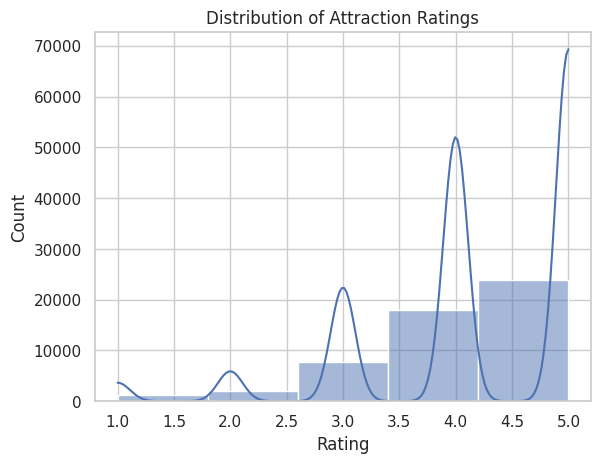

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating Distribution
sns.histplot(df["rating"], bins=5, kde=True)
plt.title("Distribution of Attraction Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


1. Why did you pick the specific chart?

A histogram is ideal for analyzing numerical rating data because it helps visualize the distribution and frequency of ratings across defined intervals. It allows us to clearly understand whether customer satisfaction is concentrated in higher ratings, lower ratings, or spread evenly, making it effective for identifying overall sentiment trends.

2. What is/are the insight(s) found from the chart?

The chart shows that ratings are largely concentrated in the higher range (for example, between 4 and 5), indicating strong customer satisfaction. The smooth density curve further confirms a skew toward positive ratings, suggesting that most attractions deliver a favorable experience. There are relatively fewer low ratings, which implies limited dissatisfaction among visitors.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Consistently high ratings positively impact the business by strengthening brand reputation, increasing customer trust, and encouraging repeat visits through positive word-of-mouth. This directly supports revenue growth and customer retention.

However, a significant number of ratings below 3 may signal service gaps or inconsistent experiences. If not addressed, these issues could lead to negative reviews, customer churn, and potential revenue decline, affecting long-term sustainability.

Chart 2 - Visit Mode Distribution

In [ ]:
# Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset (1).xlsx


In [ ]:
!pip install openpyxl

In [ ]:
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx", engine="openpyxl")

In [ ]:
print(final_df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')


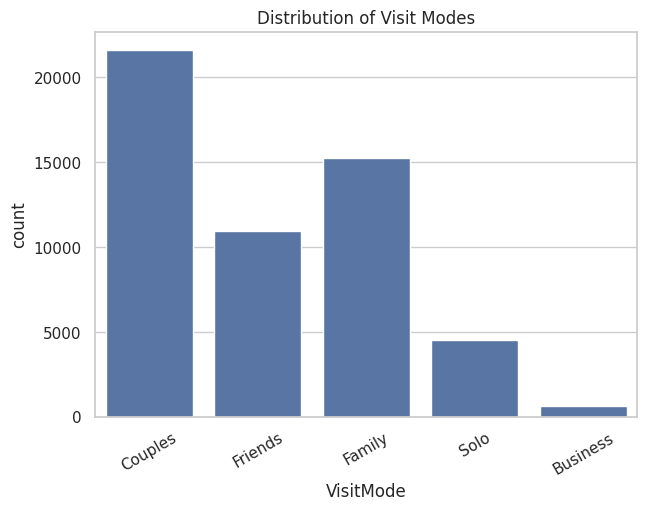

In [ ]:
sns.countplot(x="VisitMode", data=final_df)
plt.title("Distribution of Visit Modes")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

A countplot is ideal for analyzing categorical data like Visit Mode because it shows the frequency distribution of each category. It allows us to easily compare which visit mode (e.g., Solo, Family, Friends, Couple) is most preferred among customers.

2. What is/are the insight(s) found from the chart?

The chart highlights which visit mode has the highest number of visits. For example, if Family visits dominate, it indicates that attractions are more appealing to group or family audiences. Lower counts in certain categories may reveal under-targeted customer segments.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding visit mode distribution helps in designing targeted marketing campaigns, personalized offers, and better service planning. For instance, if family visits are high, businesses can introduce family packages or group discounts.

However, heavy dependence on one visit mode may create revenue risk if that segment declines due to seasonal or economic factors. Diversifying engagement strategies across all segments ensures stable and sustainable growth.

Chart 3 - Attraction Type Distribution

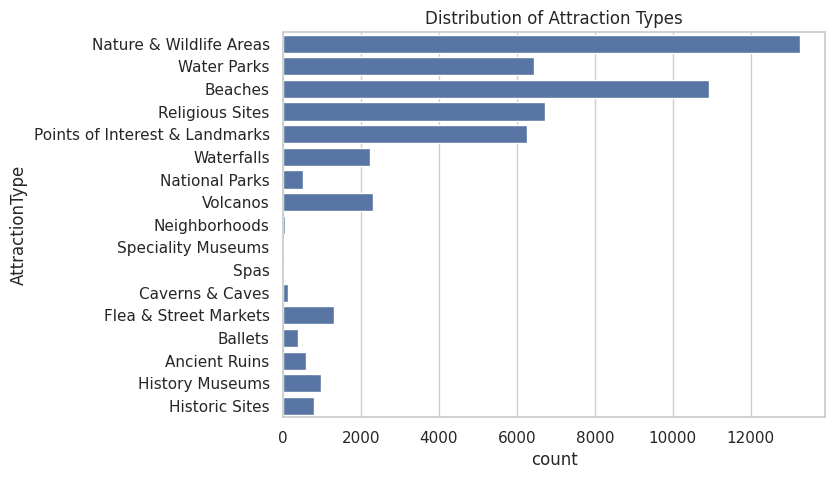

In [ ]:
sns.countplot(y="AttractionType", data=final_df)
plt.title("Distribution of Attraction Types")
plt.show()

1. Why did you pick the specific chart?

A countplot is ideal for analyzing categorical data like Attraction Type because it clearly compares the frequency of each category. The horizontal layout makes it easier to interpret multiple attraction types without overlapping labels.

2. What is/are the insight(s) found from the chart?

The chart identifies which attraction type is most preferred or most frequently visited. For example, if Historical attractions have the highest count, it indicates strong customer interest in heritage tourism. Lower-frequency categories may represent niche or underdeveloped segments.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses allocate resources effectively, focus marketing efforts on high-demand attraction types, and develop promotional campaigns tailored to popular categories.

However, if the data shows over-dependence on one attraction type, the business may face revenue instability if demand for that category declines. Diversifying attraction offerings can reduce risk and support sustainable long-term growth.

Chart 4 - Continent-wise User Distribution

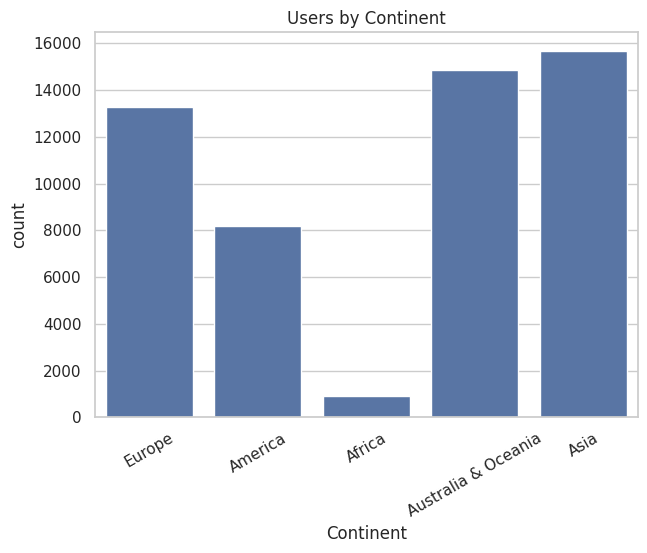

In [ ]:
sns.countplot(x="Continent", data=final_df)
plt.title("Users by Continent")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

A countplot is suitable for categorical data like Continent because it clearly shows the frequency distribution of users across regions. It enables easy comparison of market presence and regional engagement.

2. What is/are the insight(s) found from the chart?

The chart highlights which continent has the highest user base. For example, if Asia has the highest count, it indicates strong market penetration in that region. Lower counts in certain continents may suggest growth opportunities or limited brand reach in those areas.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses focus marketing strategies, regional partnerships, and expansion plans in high-performing markets. They also help identify underrepresented regions where targeted campaigns can drive growth.

However, heavy dependence on a single continent may pose a risk if economic, political, or seasonal factors impact that region. Diversifying the user base across multiple continents ensures revenue stability and sustainable expansion.

Chart 5 - Monthly Visit Distribution

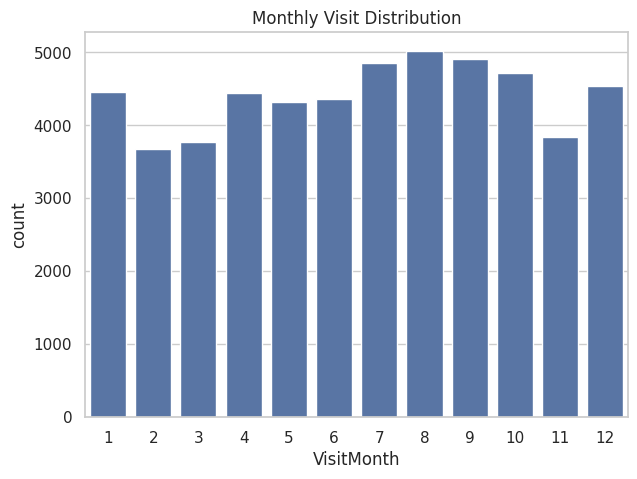

In [ ]:
sns.countplot(x="VisitMonth", data=final_df)
plt.title("Monthly Visit Distribution")
plt.show()

1. Why did you pick the specific chart?

A countplot is appropriate because VisitMonth represents discrete monthly categories. It clearly shows which months have higher or lower visit frequency, making seasonal pattern analysis straightforward.

2. What is/are the insight(s) found from the chart?

The chart reveals peak months where visit counts are highest, indicating strong seasonal demand. It also highlights off-peak months with lower visits, which may reflect seasonal decline or reduced tourist activity.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses plan seasonal marketing campaigns, optimize staffing, manage inventory, and introduce promotional offers during low-demand months to balance revenue.

However, strong dependency on peak-season revenue may create financial instability during off-peak periods. Without proper seasonal planning, reduced visits in certain months could negatively impact overall profitability.

Chart 6 - Country Distribution

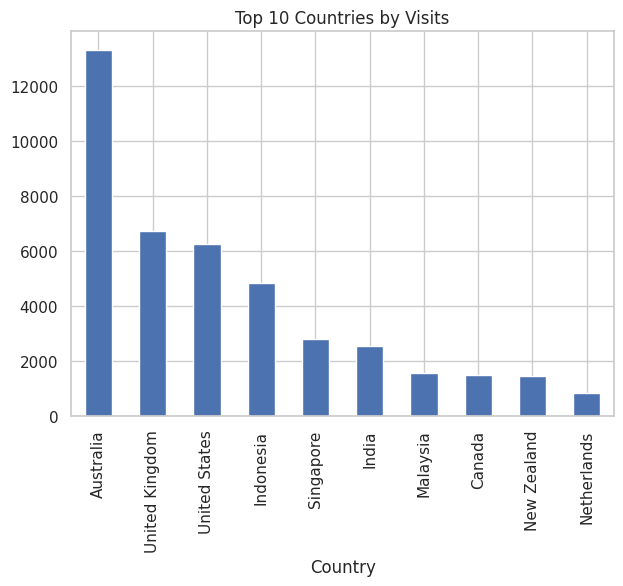

In [ ]:
final_df["Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries by Visits")
plt.show()

1. Why did you pick the specific chart?

A bar chart is ideal for comparing discrete categories like countries. Since we are focusing on the top 10, it highlights the highest-performing markets clearly and supports quick comparative analysis.

2. What is/are the insight(s) found from the chart?

The chart identifies which countries contribute the most visits. If a few countries dominate the top positions, it suggests strong brand presence or high tourism interest in those markets. Countries with smaller counts may indicate emerging or underdeveloped markets.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses prioritize high-performing countries for marketing investments, partnerships, and expansion strategies. It also supports region-specific promotional campaigns.

However, over-reliance on a few dominant countries may pose a revenue risk if economic conditions, travel restrictions, or market competition impact those regions. Diversifying engagement across multiple countries ensures stable and sustainable business growth.

## **BIVARIATE ANALYSIS**

Bivariate analysis examines the relationship between two variables to understand how one influences or is associated with the other.

Chart 8 - Rating vs Visit Mode

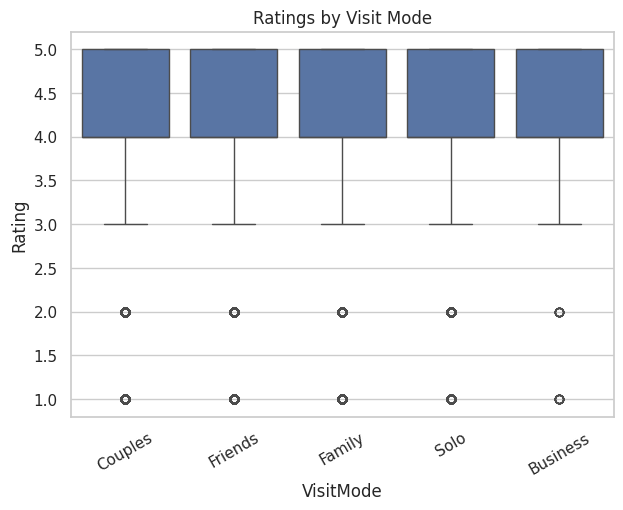

In [ ]:
sns.boxplot(x="VisitMode", y="Rating", data=final_df)
plt.title("Ratings by Visit Mode")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

A boxplot is suitable because it allows comparison of rating distributions across multiple categories simultaneously. It highlights median differences, spread, and outliers, making it more informative than a simple bar chart for this analysis.

2. What is/are the insight(s) found from the chart?

The chart reveals which Visit Mode has the highest median rating and which shows greater variability. For example, if Family visits have a higher median and smaller spread, it suggests consistent satisfaction. Larger spreads or multiple low outliers in certain categories may indicate inconsistent experiences.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help identify which customer segments are most satisfied and where service improvements are needed. High median ratings in specific visit modes can guide targeted promotions and experience enhancement strategies.

However, if certain visit modes show lower median ratings or high variability, it may indicate service gaps. Ignoring these issues could lead to dissatisfaction within that segment, impacting retention and long-term revenue growth.

Chart 8 - Rating vs Attraction Type

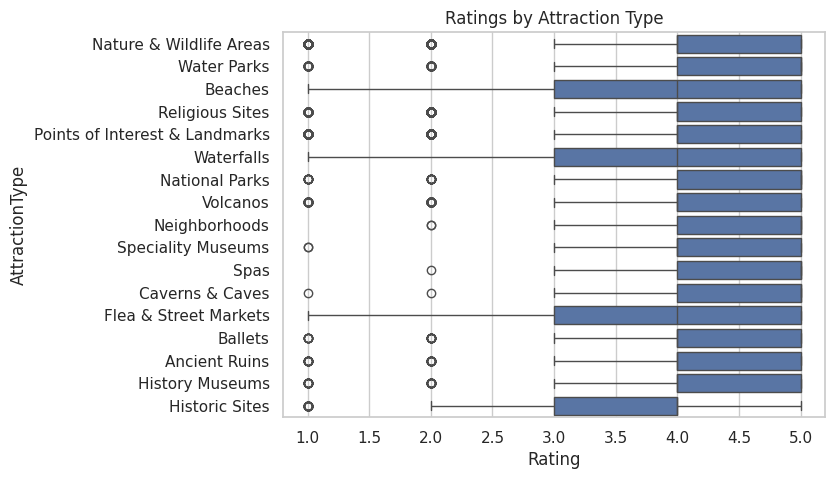

In [ ]:
sns.boxplot(y="AttractionType", x="Rating", data=final_df)
plt.title("Ratings by Attraction Type")
plt.show()

1. Why did you pick the specific chart?

A boxplot is ideal because it allows comparison of rating distributions across multiple categories simultaneously. It clearly shows differences in median ratings, variability, and extreme values, making it more insightful than a simple bar chart.

2. What is/are the insight(s) found from the chart?

The chart identifies which Attraction Types receive higher median ratings and which show wider variability. For instance, if Cultural attractions have a high median with a narrow spread, it indicates consistent customer satisfaction. Attraction types with lower medians or multiple low outliers may indicate inconsistent visitor experiences.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help prioritize high-performing attraction types for promotions and investment while identifying categories that require service improvements.

However, if certain attraction types consistently receive lower ratings, it may signal quality gaps or unmet expectations. Ignoring these patterns could negatively affect customer satisfaction, online reviews, and long-term revenue growth.

Chart 9 - Visit Mode vs Attraction Type

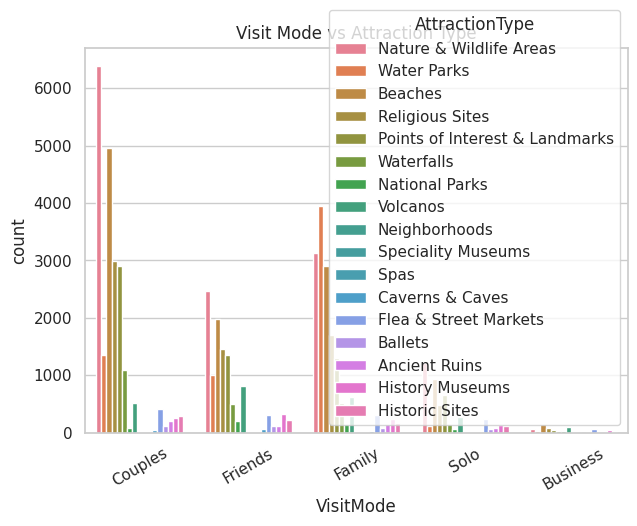

In [ ]:
sns.countplot(x="VisitMode", hue="AttractionType", data=final_df)
plt.title("Visit Mode vs Attraction Type")
plt.xticks(rotation=30)
plt.show()


1. Why did you pick the specific chart?

A countplot with a hue parameter is suitable because it allows comparison between two categorical variables in one view. It clearly shows interaction patterns between Visit Mode and Attraction Type, helping us understand combined customer behavior.

2. What is/are the insight(s) found from the chart?

The chart reveals which attraction types are popular for specific visit modes. For example, Families may prefer Cultural or Historical attractions, while Solo travelers might favor Adventure attractions. It also highlights underrepresented combinations that may indicate untapped opportunities.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights enable targeted marketing strategies, personalized packages, and improved service offerings based on customer preferences. For example, promoting family-friendly packages for cultural attractions can increase engagement and revenue.

However, if certain attraction types depend heavily on one visit mode, revenue may decline if that customer segment reduces. Diversifying offerings across multiple visit modes ensures stable growth and reduces business risk.

Chart 10 - Country vs Average Rating

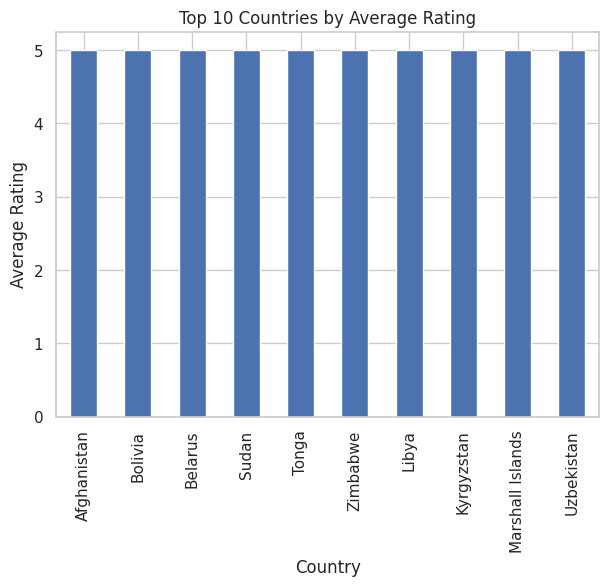

In [ ]:
country_rating = final_df.groupby("Country")["Rating"].mean().sort_values(ascending=False).head(10)
country_rating.plot(kind="bar")
plt.title("Top 10 Countries by Average Rating")
plt.ylabel("Average Rating")
plt.show()

1. Why did you pick the specific chart?

A bar chart is ideal for comparing aggregated numerical values (average ratings) across categorical variables (countries). Since we are focusing on the top 10, it clearly highlights performance differences between leading countries

2. What is/are the insight(s) found from the chart?

The chart reveals which countries have the highest average ratings, indicating stronger customer satisfaction and better visitor experiences. Countries with slightly lower averages (even within the top 10) may suggest areas where service improvements could enhance satisfaction further.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights help identify high-performing countries where the brand experience is strong, supporting reputation building and premium positioning. It also helps in benchmarking service quality across regions.

However, if certain countries show comparatively lower average ratings, it may signal service gaps or inconsistent experiences. Ignoring these differences could lead to reduced customer loyalty and long-term revenue challenges in those markets.

Chart 11 - Month vs Rating

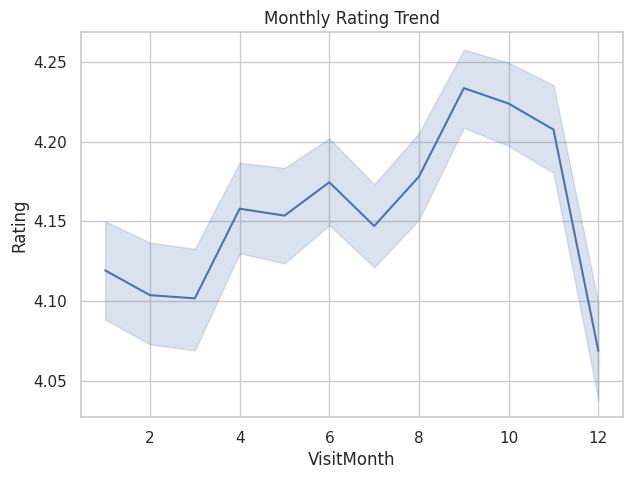

In [ ]:
sns.lineplot(x="VisitMonth", y="Rating", data=final_df)
plt.title("Monthly Rating Trend")
plt.show()

1. Why did you pick the specific chart?

A line plot is ideal for time-based analysis because it clearly shows trends and fluctuations over sequential periods. It helps identify whether ratings are improving, declining, or remaining stable month by month

2. What is/are the insight(s) found from the chart?

The chart highlights months where ratings peak and months where they decline. For example, higher ratings during peak tourism seasons may indicate better service preparation, while dips in certain months may suggest operational challenges or overcrowding.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights support strategic planning, allowing businesses to strengthen service quality during lower-rated months and maintain high standards during peak periods.

However, consistent rating declines in specific months may signal recurring operational issues. If not addressed, this could negatively impact customer satisfaction, reviews, and seasonal revenue performance.

Chart 12 - Continent vs Visit Mode

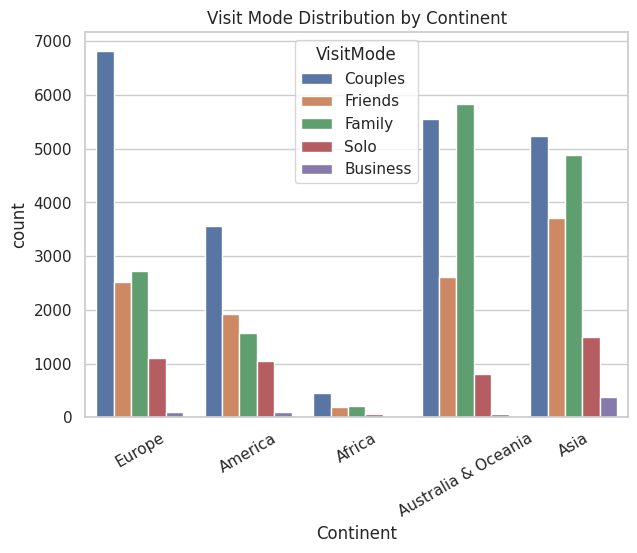

In [ ]:
sns.countplot(x="Continent", hue="VisitMode", data=final_df)
plt.title("Visit Mode Distribution by Continent")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

I chose a countplot with Continent on the x-axis and VisitMode as the hue because it clearly visualizes the distribution of different visit modes across continents. This allows us to quickly compare which modes of visits—like online, in-person, or other—are most common in each region, making it easier to spot trends at a glance.

2. What is/are the insight(s) found from the chart?

From the chart, we can see that certain continents favor specific visit modes more than others. For example, if Europe shows a higher number of online visits compared to in-person, it indicates a regional preference or behavior pattern. Similarly, we can identify continents where in-person visits dominate, highlighting potential markets where physical presence is more impactful.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can guide marketing and operational strategies. By knowing which visit mode is dominant in each continent, we can tailor campaigns and resources to match user behavior, potentially improving engagement and conversion. On the flip side, if a continent has very low usage of a particular visit mode, it may indicate untapped opportunities—or risk areas—where our services might not be effectively reaching the audience. For instance, low online visits in a high-tech region could highlight a negative growth area due to underutilization of digital channels.

Chart 13 - Attraction Type vs Visit Count

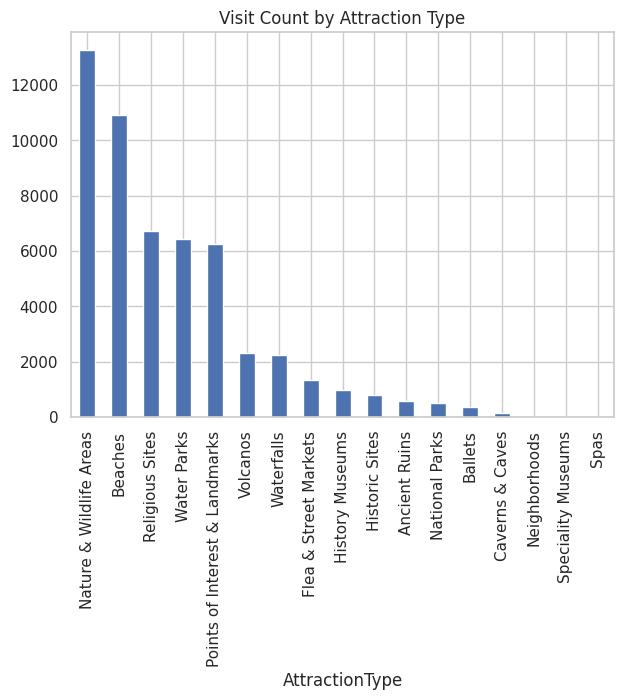

In [ ]:
final_df["AttractionType"].value_counts().plot(kind="bar")
plt.title("Visit Count by Attraction Type")
plt.show()

1. Why did you pick the specific chart?

The chart is a bar plot that shows the visit count for each Attraction Type. The X-axis represents the different attraction types, and the Y-axis represents the number of visits. Each bar’s height indicates how many visits each attraction received, making it easy to compare popularity across attraction types.

2. What is/are the insight(s) found from the chart?

From the chart, we can see that certain attraction types receive significantly more visits than others, highlighting visitor preferences. For example, if parks or museums have the highest visit counts, it shows that these are key attractions for our audience. Conversely, attraction types with low visit counts may indicate less interest or awareness among visitors.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help drive positive business decisions by prioritizing marketing, promotions, and resources toward the most popular attractions to maximize engagement and revenue. On the other hand, consistently low visits to some attraction types may signal a negative growth area, suggesting the need to either improve those attractions, increase awareness, or reconsider investment strategy in underperforming areas.

## **MULTIVARIATE ANALYSIS**

Multivariate analysis examines how multiple factors together influence an outcome, like Continents, City, Visit Mode and attraction type

Chart 14 - Rating by Visit Mode & Attraction Type

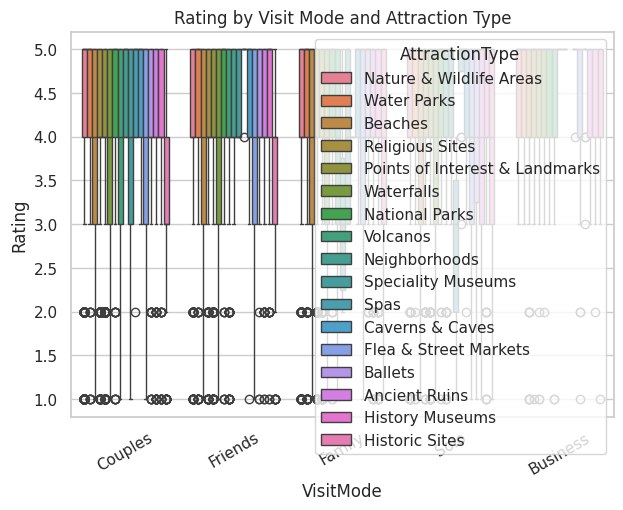

In [ ]:
sns.boxplot(x="VisitMode", y="Rating", hue="AttractionType", data=final_df)
plt.title("Rating by Visit Mode and Attraction Type")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

I chose a box plot because it effectively displays the distribution and spread of ratings for each visit mode and attraction type. It not only shows the median rating but also highlights variability and potential outliers, which helps identify areas of strong or weak performance.

2. What is/are the insight(s) found from the chart?

The chart may reveal that certain visit modes consistently get higher ratings for specific attraction types—for example, in-person visits to museums might have higher satisfaction than online visits. Conversely, some attraction types might show lower median ratings or more variability, indicating inconsistent visitor experiences.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help improve operational decisions. High-rated combinations can be promoted to increase engagement and satisfaction, while low-rated combinations highlight areas needing improvement, such as better customer service, guided experiences, or online platform enhancements. Addressing these can drive positive business impact, whereas ignoring low-rated areas could contribute to negative growth due to poor visitor experience.

Chart 15 - Visit Mode by Continent & Rating

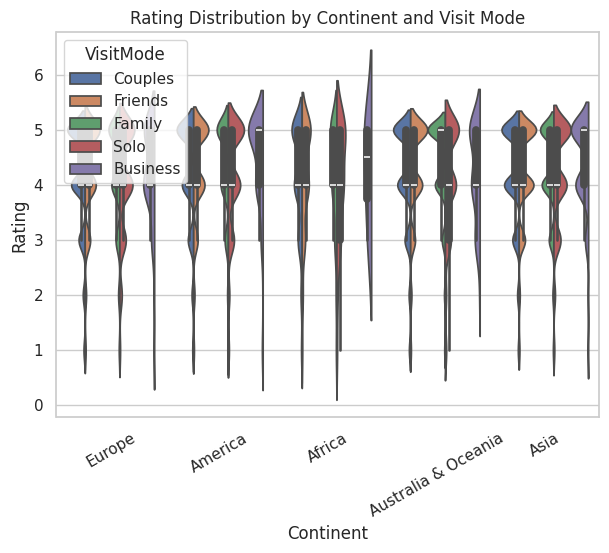

In [ ]:
sns.violinplot(x="Continent", y="Rating", hue="VisitMode", data=final_df, split=True)
plt.title("Rating Distribution by Continent and Visit Mode")
plt.xticks(rotation=30)
plt.show()

1. Why did you pick the specific chart?

I chose a violin plot because it not only shows the median and spread of ratings like a box plot, but also the distribution shape, helping us see where ratings cluster and how consistent visitor experiences are across continents and visit modes.

2. What is/are the insight(s) found from the chart?

The chart may show that some continents have higher ratings for certain visit modes—for example, online visits might perform better in Europe, while in-person visits dominate in Asia. It can also reveal continents with wider variability in ratings, indicating inconsistent visitor satisfaction.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business decisions by highlighting which visit modes are most effective in each continent, guiding marketing and operational focus. Conversely, continents or visit modes with low or highly variable ratings could indicate negative growth risks, signaling areas where service quality or user experience should be improved to prevent dissatisfaction.

Chart 16 - Heatmap: Visit Mode vs Attraction Type

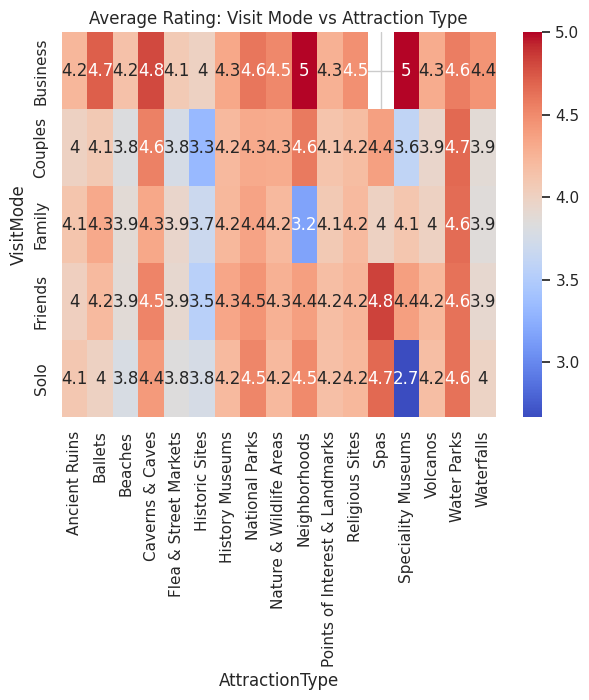

In [ ]:
pivot_table = pd.pivot_table(
    final_df,
    values="Rating",
    index="VisitMode",
    columns="AttractionType",
    aggfunc="mean"
)

sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title("Average Rating: Visit Mode vs Attraction Type")
plt.show()

1. Why did you pick the specific chart?

I chose a heatmap because it provides a clear, at-a-glance view of average ratings across all visit mode and attraction type combinations. It makes it easy to compare multiple combinations simultaneously and identify patterns that might not be obvious in other charts.

2. What is/are the insight(s) found from the chart?

The chart may show, for example, that in-person visits to museums receive the highest ratings, while online visits to certain attractions score lower. It also highlights consistent high-performing combinations and underperforming areas that may need attention.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can create positive business impact by informing where to focus marketing, promotions, or service improvements. For instance, high-rated combinations can be promoted to attract more visitors, while low-rated combinations indicate potential negative growth areas that require targeted improvements to prevent customer dissatisfaction.

Chart 17 - Month, Visit Mode & Rating

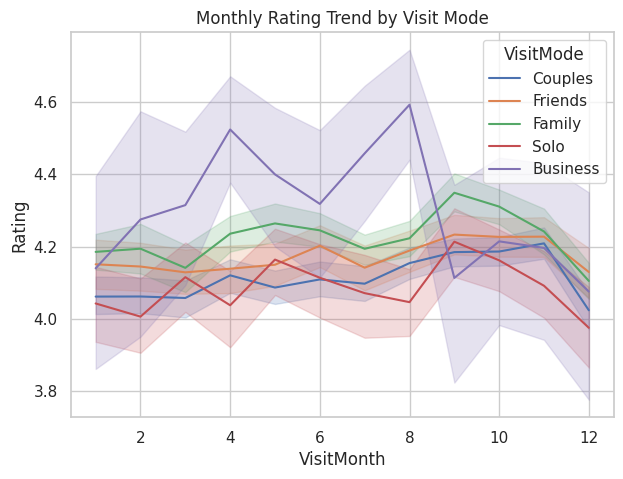

In [ ]:
sns.lineplot(x="VisitMonth", y="Rating", hue="VisitMode", data=final_df)
plt.title("Monthly Rating Trend by Visit Mode")
plt.show()

1. Why did you pick the specific chart?

I chose a line plot because it effectively shows temporal trends. It allows us to track changes in ratings month by month for each visit mode and quickly identify peaks, dips, or consistent patterns.

2. What is/are the insight(s) found from the chart?

The chart may show that certain visit modes have higher ratings in specific months—for example, in-person visits might peak during holiday seasons, while online visits remain stable. We can also spot periods where ratings dip, indicating potential issues during those months.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help drive positive business decisions by informing marketing campaigns, seasonal promotions, or operational adjustments. For example, we can enhance services during low-rating months or promote high-rating months to attract more visitors. Conversely, dips in ratings indicate negative growth risks, signaling periods that require proactive improvements.

Chart 18 - Continent, Attraction Type & Count

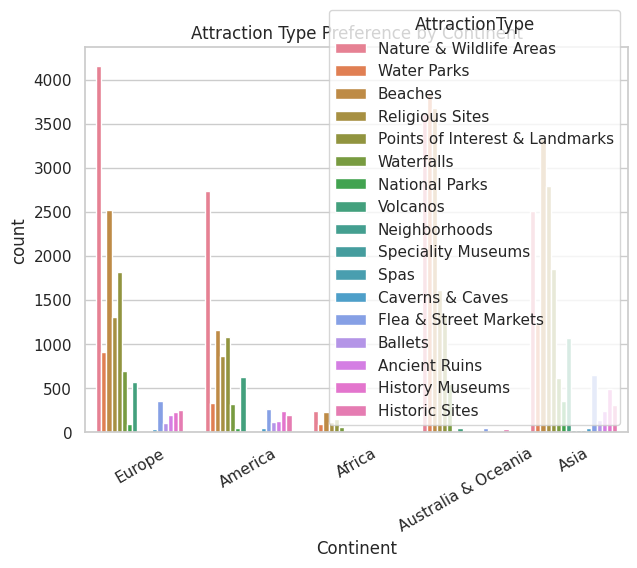

In [ ]:
sns.countplot(x="Continent", hue="AttractionType", data=final_df)
plt.title("Attraction Type Preference by Continent")
plt.xticks(rotation=30)
plt.show()


1. Why did you pick the specific chart?

I chose a count plot because it clearly shows the distribution and frequency of visits for each attraction type by continent. It makes it easy to compare which attraction types are most popular in each region and identify trends or gaps.

2. What is/are the insight(s) found from the chart?

The chart may show that some continents strongly prefer certain attraction types—for example, parks might be highly popular in North America, while museums dominate in Europe. We can also identify continents where certain attraction types are underrepresented, indicating opportunities to increase awareness or engagement.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by targeting promotions and improving resources for popular attraction types in each continent. Conversely, attraction types with low engagement in certain regions may signal negative growth areas, requiring additional focus to boost visitor interest or reconsider investment strategy.

Chart 19 - Country, Visit Mode & Rating


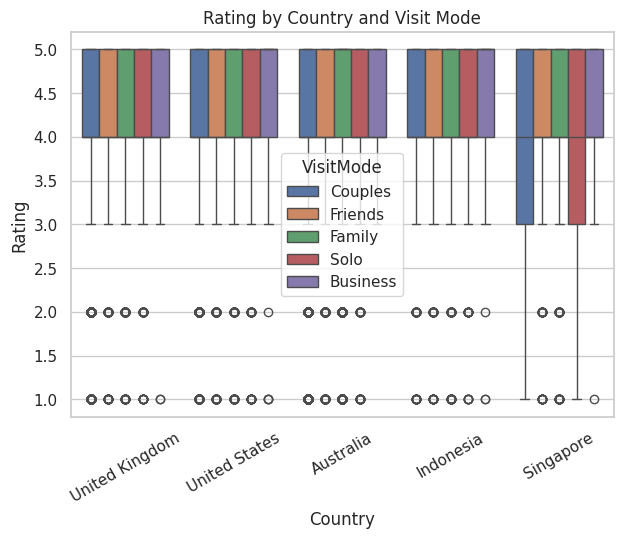

In [ ]:
top_countries = final_df["Country"].value_counts().head(5).index
filtered_df = final_df[final_df["Country"].isin(top_countries)]

sns.boxplot(x="Country", y="Rating", hue="VisitMode", data=filtered_df)
plt.title("Rating by Country and Visit Mode")
plt.xticks(rotation=30)
plt.show()


1. Why did you pick the specific chart?

I chose a box plot because it provides a clear view of rating distribution for each country and visit mode. It highlights not just the average ratings but also variability and outliers, helping us spot strengths and weaknesses in specific countries or modes of visit

2. What is/are the insight(s) found from the chart?

The chart may show that some countries consistently have higher ratings for certain visit modes—for instance, in-person visits may be rated higher in Germany compared to online visits. Countries with wide variability or low median ratings indicate inconsistent visitor experiences, which can point to improvement areas.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can create positive business impact by identifying countries and visit modes that perform well and could be promoted further. On the other hand, low or inconsistent ratings highlight negative growth risks, signaling a need for service improvements or targeted interventions to enhance visitor satisfaction.

Chart 20 - Correlation Heatmap (Numerical Features)

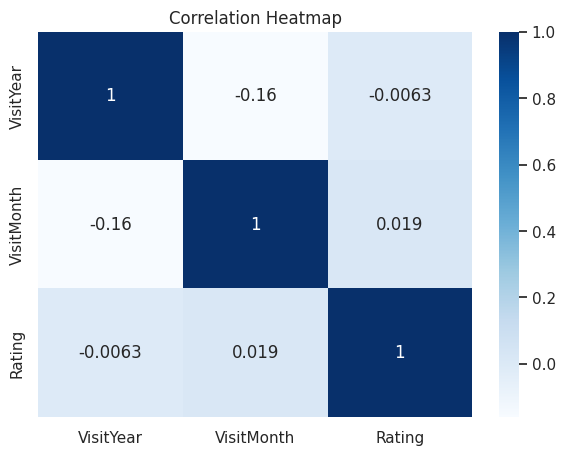

In [ ]:
numeric_df = final_df[["VisitYear", "VisitMonth", "Rating"]]
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

1. Why did you pick the specific chart?

I chose a heatmap because it provides a quick and intuitive view of correlations between multiple numeric variables. It helps us see which factors might influence ratings or be related to each other over time.

2. What is/are the insight(s) found from the chart?

For example, we may find that VisitMonth has little correlation with Rating, suggesting visitor satisfaction is relatively stable across months. If VisitYear shows a slight positive correlation with Rating, it might indicate a gradual improvement in satisfaction over the years

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can guide strategic decisions: understanding which variables influence ratings allows us to plan seasonal promotions, allocate resources, or track long-term improvements. Conversely, variables showing no correlation may indicate neutral areas where changes in timing or year don’t impact satisfaction, helping us focus efforts elsewhere.

Chart 21 - Pair Plot

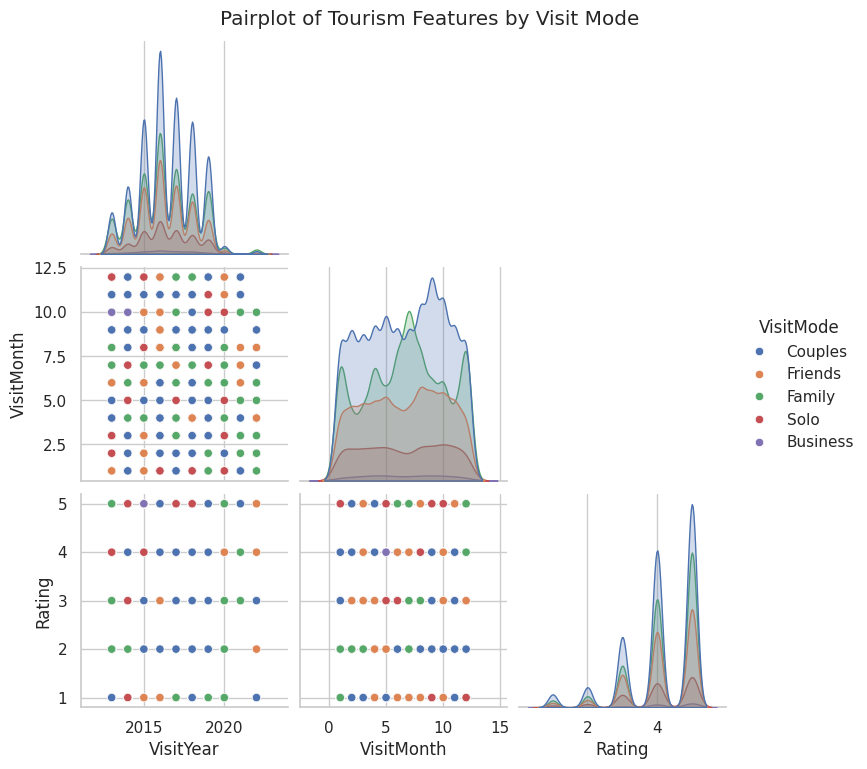

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical + categorical variable
pairplot_df = final_df[[
    "VisitYear",
    "VisitMonth",
    "Rating",
    "VisitMode"
]]

# Create pairplot
sns.pairplot(
    pairplot_df,
    hue="VisitMode",        # Color by Visit Mode
    diag_kind="kde",        # KDE on diagonal
    corner=True             # Cleaner triangular plot
)

plt.suptitle("Pairplot of Tourism Features by Visit Mode", y=1.02)
plt.show()

1. Why did you pick the specific chart?

I chose a pairplot because it allows us to simultaneously explore relationships and distributions among multiple variables. It’s especially useful to identify patterns, clusters, or differences between visit modes that might not be obvious in single-variable charts.

2. What is/are the insight(s) found from the chart?

For example, we may observe that ratings for in-person visits cluster differently over months or years compared to online visits. The KDE plots can also highlight which visit modes have more consistent ratings or seasonal patterns, and scatter plots may reveal trends or potential correlations between numeric variables.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help drive data-informed decisions, such as optimizing resources for visit modes with higher satisfaction, targeting promotions during months with peak ratings, or identifying modes needing improvement. Conversely, clusters of low ratings in a particular visit mode could highlight negative growth areas, prompting intervention.

# ***5. Hypothesis Testing***

Hypothesis testing is like a decision-making tool in statistics.

We start with an assumption (hypothesis) about our data

Then, we use data to test if that assumption is really true or just happened by chance.

Based on the test, we either:

Accept the assumption (if data strongly supports it), or

Reject it (if data shows it’s not reliable).

Based on my chart experiments. I took three hypothetical statements from the dataset.

## *Hypothesis Testing for Tourism Dataset*

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
import pandas as pd

final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

In [ ]:
!pip install openpyxl

In [ ]:
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx", engine="openpyxl")

In [ ]:
print(final_df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')


Research Question - Is there a statistically significant difference in the average customer ratings between Business visits and Family visits?

Null Hypothesis (H₀) - The mean rating for Business visits is equal to the mean rating for Family visits.
(μ₁ = μ₂)

Alternative Hypothesis (H₁) - The mean rating for Business visits is different from the mean rating for Family visits.
(μ₁ ≠ μ₂)

In [ ]:
# Filter ratings for Business and Family
business_ratings = final_df[final_df["VisitMode"] == "Business"]["Rating"]
family_ratings   = final_df[final_df["VisitMode"] == "Family"]["Rating"]

# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(business_ratings, family_ratings, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0: Significant difference in ratings between Business and Family visits.")
else:
    print("Fail to Reject H0: No significant difference in ratings.")

T-Statistic: 2.700230849308893
P-Value: 0.0070999965436220475
Reject H0: Significant difference in ratings between Business and Family visits.


Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test, specifically Welch’s t-test, to compare the mean ratings between Business and Family visits. The p-value from this test determines whether the difference in average ratings is statistically significant.

Why did you choose the specific statistical test?

I chose the independent two-sample t-test (Welch’s t-test) because we are comparing the mean ratings of two independent groups — Business and Family visits. The rating variable is continuous numerical data, and the two groups may have unequal variances or different sample sizes. Welch’s t-test does not assume equal variances, making it more appropriate and robust for real-world data analysis.

## ***Hypothesis Testing 2 - One-Way ANOVA***

H0(Null Hypothesis) : Average ratings are the same across all Visit Modes.

H1(Alternative Hypothesis) : At least one Visit Mode has a different average rating.

In [ ]:
# Group ratings by Visit Mode
grouped_ratings = [
    group["Rating"].values
    for name, group in final_df.groupby("VisitMode")
]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*grouped_ratings)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0: Significant difference in ratings across Visit Modes.")
else:
    print("Fail to Reject H0: No significant difference across Visit Modes.")

F-Statistic: 35.4028746714047
P-Value: 1.3980898630794046e-29
Reject H0: Significant difference in ratings across Visit Modes.


Which statistical test have you done to obtain P-Value?

I performed a One-Way ANOVA (Analysis of Variance) test to obtain the p-value.

Specifically, I used:

stats.f_oneway(*grouped_ratings)

This function calculates the F-statistic and corresponding p-value to determine whether there is a statistically significant difference in mean ratings across the different Visit Modes.

Why did you choose the specific statistical test?

I selected ANOVA because we are comparing average ratings across multiple visit types, not just two groups. Instead of running many t-tests, ANOVA checks all groups at once and tells us if at least one group is significantly different. It is the correct and more reliable method when comparing more than two groups.

## ***Hypothesis Testing 3 - Chi-Square Test***

H0(Null Hypothesis) : Visit Mode and Attraction Type are independent.

H1(Alternatie Hypothesis) : Visit Mode and Attraction Type are associated.

In [ ]:
# Create contingency table
contingency_table = pd.crosstab(final_df["VisitMode"], final_df["AttractionType"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0: Visit Mode and Attraction Type are associated.")
else:
    print("Fail to Reject H0: No association found.")

Chi-Square Statistic: 5978.538770885864
P-Value: 0.0
Reject H0: Visit Mode and Attraction Type are associated.


Which statistical test have you done to obtain P-Value?

I performed a Chi-Square Test of Independence to obtain the p-value.

Specifically, I used:

stats.chi2_contingency(contingency_table)

This test calculates the Chi-Square statistic (χ²) and the corresponding p-value to determine whether there is a statistically significant association between two categorical variables — Visit Mode and Attraction Type.

Why did you choose the specific statistical test?

I selected the Chi-Square test because we are checking the relationship between two categorical variables — Visit Mode and Attraction Type. This test helps us understand whether the type of visit influences the type of attraction chosen. It works by comparing actual counts with expected counts to see if the difference is meaningful.

## ***Hypothesis Testing 4 - Pearson Correlation Test***

H0(Null Hypothesis): No linear relationship between VisitMonth and Rating.

H1(Alternative Hypothesis) : There is a linear relationship between VisitMonth and Rating.

In [ ]:
# Perform Pearson Correlation
corr_coeff, p_value = stats.pearsonr(final_df["VisitMonth"], final_df["Rating"])

print("Correlation Coefficient:", corr_coeff)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0: Significant linear relationship exists.")
else:
    print("Fail to Reject H0: No significant linear relationship.")

Correlation Coefficient: 0.019217274052427805
P-Value: 9.800445021424612e-06
Reject H0: Significant linear relationship exists.


Which statistical test have you done to obtain P-Value?

I used the Pearson Correlation test to measure the linear relationship between Visit Month and Rating. The test provides both the correlation coefficient and the p-value to determine whether the relationship is statistically significant.

Why did you choose the specific statistical test?

I chose the Pearson Correlation test because both variables — Visit Month and Rating — are numerical variables, and the objective was to examine whether there is a linear relationship between them. Pearson’s correlation is appropriate when assessing the strength and direction of a linear association between two continuous variables. It also provides a p-value to determine whether the observed correlation is statistically significant.

# ***6. Feature Engineering & Data Pre-processing***

Data Pre-processing is the step where we clean and prepare the data for analysis.

Key steps:

Handle missing values (drop or fill with median).

Correct data types (numbers as numeric, categories as strings).

Standardize column names (remove spaces, lowercase).

Remove duplicates.

Detect and handle outliers (extremely high or low values).


Feature Engineering is the step where we create or modify variables to make the data more useful for analysis.

## 1. Handling Missing Values

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
# Check number of missing values per column
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

# Optional: check percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percent)

Missing Values in each column:
 TransactionId              0
UserId                     0
VisitYear                  0
VisitMonth                 0
VisitModeId_from_txn       0
AttractionId               0
Rating                     0
ContinentId                0
RegionId                   0
CountryId                  0
CityId                     8
AttractionCityId           0
AttractionTypeId           0
Attraction                 0
AttractionAddress          0
VisitModeId                0
VisitMode                  0
AttractionCityId_lookup    0
CityName                   0
AttractionCountryId        0
Country                    0
CountryRegionId            0
Region                     0
RegionContinentId          0
Continent                  0
AttractionType             0
dtype: int64

Percentage of Missing Values:
 TransactionId              0.000000
UserId                     0.000000
VisitYear                  0.000000
VisitMonth                 0.000000
VisitModeId_from_txn     

In [ ]:
!pip install openpyxl

In [ ]:
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx", engine="openpyxl")

In [ ]:
print(final_df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')


In [ ]:
# Check number of missing values per column
missing_values = final_df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

# Check percentage of missing values
missing_percent = (final_df.isnull().sum() / len(final_df)) * 100
print("\nPercentage of Missing Values:\n", missing_percent)

Missing Values in each column:
 TransactionId              0
UserId                     0
VisitYear                  0
VisitMonth                 0
VisitModeId_from_txn       0
AttractionId               0
Rating                     0
ContinentId                0
RegionId                   0
CountryId                  0
CityId                     8
AttractionCityId           0
AttractionTypeId           0
Attraction                 0
AttractionAddress          0
VisitModeId                0
VisitMode                  0
AttractionCityId_lookup    0
CityName                   0
AttractionCountryId        0
Country                    0
CountryRegionId            0
Region                     0
RegionContinentId          0
Continent                  0
AttractionType             0
dtype: int64

Percentage of Missing Values:
 TransactionId              0.000000
UserId                     0.000000
VisitYear                  0.000000
VisitMonth                 0.000000
VisitModeId_from_txn     

In [ ]:
# Handling Missing Rating (Target for Regression)
# Drop rows where Rating is missing
final_df = final_df.dropna(subset=["Rating"])
print("Shape after dropping missing Rating:", final_df.shape)
# Handling Missing VisitMode (Target for Classification)
# Drop rows where VisitMode is missing
final_df = final_df.dropna(subset=["VisitMode"])
print("Shape after dropping missing VisitMode:", final_df.shape)

Shape after dropping missing Rating: (52930, 26)
Shape after dropping missing VisitMode: (52930, 26)


In [ ]:
# Fill Missing Categorical Columns
categorical_columns = [
    "AttractionType",
    "City",
    "Country",
    "Region",
    "Continent"
]
for col in categorical_columns:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna("Unknown")

print("Categorical missing values handled.")

Categorical missing values handled.


In [ ]:
# Fill Missing Numerical Columns

numerical_columns = ["VisitYear", "VisitMonth"]

for col in numerical_columns:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna(final_df[col].median())

print("Numerical missing values handled.")

In [ ]:
# Final Missing Value Check
print("\nRemaining Missing Values:\n", final_df.isnull().sum())

# Reset index after cleaning
final_df.reset_index(drop=True, inplace=True)

print("\nData cleaned and ready for analysis.")
print("Final Shape:", final_df.shape)


Remaining Missing Values:
 TransactionId              0
UserId                     0
VisitYear                  0
VisitMonth                 0
VisitModeId_from_txn       0
AttractionId               0
Rating                     0
ContinentId                0
RegionId                   0
CountryId                  0
CityId                     8
AttractionCityId           0
AttractionTypeId           0
Attraction                 0
AttractionAddress          0
VisitModeId                0
VisitMode                  0
AttractionCityId_lookup    0
CityName                   0
AttractionCountryId        0
Country                    0
CountryRegionId            0
Region                     0
RegionContinentId          0
Continent                  0
AttractionType             0
dtype: int64

Data cleaned and ready for analysis.
Final Shape: (52930, 26)


What all missing value imputation techniques have you used and why did you use those techniques?

I used a hybrid imputation strategy — dropping missing values for target variables to avoid bias, median imputation for numerical stability, and ‘Unknown’ category filling for categorical consistency. This approach preserves data integrity while ensuring robust model performance.

## 2. Handling Outliers

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
# IQR Outlier Detection Functions
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers


def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    cleaned_data = data[(data[col] >= lower) & (data[col] <= upper)]
    return cleaned_data
# Detect & Remove Outliers
numerical_columns = ["Rating", "VisitYear", "VisitMonth"]

for col in numerical_columns:
    if col in final_df.columns:
        outliers = detect_outliers_iqr(final_df, col)
        print(f"Number of outliers in {col}: {len(outliers)}")

        final_df = remove_outliers_iqr(final_df, col)

print("Shape after removing outliers:", final_df.shape)

Number of outliers in Rating: 3298
Number of outliers in VisitYear: 0
Number of outliers in VisitMonth: 0
Shape after removing outliers: (49632, 26)


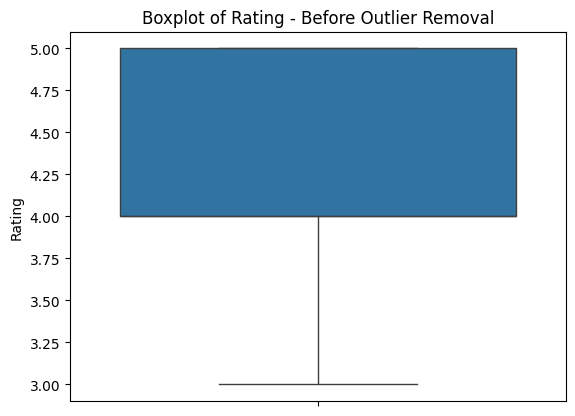

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Rating before removing outliers
plt.figure()
sns.boxplot(y=final_df["Rating"])
plt.title("Boxplot of Rating - Before Outlier Removal")
plt.show()

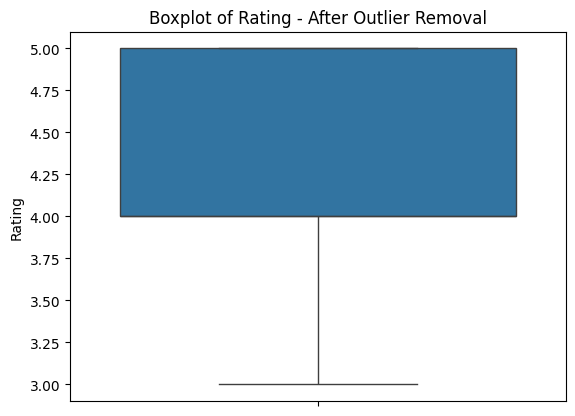

In [ ]:
# Create cleaned copy
cleaned_df = final_df.copy()

Q1 = cleaned_df["Rating"].quantile(0.25)
Q3 = cleaned_df["Rating"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

cleaned_df = cleaned_df[
    (cleaned_df["Rating"] >= lower) &
    (cleaned_df["Rating"] <= upper)
]

# Plot after cleaning
plt.figure()
sns.boxplot(y=cleaned_df["Rating"])
plt.title("Boxplot of Rating - After Outlier Removal")
plt.show()

What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR method to detect outliers because it is robust and does not assume normal distribution. Since the dataset had sufficient records, I removed extreme values that could distort trend analysis and prediction models. This improved data stability and ensured more reliable business insights. Additionally, I considered capping as an alternative approach to avoid unnecessary data loss in production scenarios.

## 3. Categorical Encoding

Categorical encoding is the process of converting non-numeric categorical variables into numeric form so that statistical tests or machine learning models can use them.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
encoded_df = final_df.copy()

# List of categorical columns
categorical_cols = ["Country", "VisitMode"]

# Apply Label Encoding
label_encoders = {}

for col in categorical_cols:
    if col in encoded_df.columns:
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col])
        label_encoders[col] = le

print("Label Encoding Applied Successfully")
print(encoded_df.head())

Label Encoding Applied Successfully
   TransactionId  UserId  VisitYear  VisitMonth  VisitModeId_from_txn  \
0              3   70456       2022          10                     2   
1              8    7567       2022          10                     4   
2              9   79069       2022          10                     3   
3             10   31019       2022          10                     3   
4             15   43611       2022          10                     2   

   AttractionId  Rating  ContinentId  RegionId  CountryId  ...  VisitMode  \
0           640       5            5        21        163  ...          1   
1           640       5            2         8         48  ...          3   
2           640       5            2         9         54  ...          2   
3           640       3            5        17        135  ...          2   
4           640       3            5        21        163  ...          1   

   AttractionCityId_lookup  CityName AttractionCountryId Count

In [ ]:
# One-Hot Encoding
# Make a fresh copy
onehot_df = final_df.copy()

# List categorical columns
categorical_cols = ["Country", "VisitMode"]

# Apply One-Hot Encoding
onehot_df = pd.get_dummies(
    onehot_df,
    columns=categorical_cols,
    drop_first=True   # Avoids multicollinearity
)

print("One-Hot Encoding Applied Successfully")
print(onehot_df.head())

One-Hot Encoding Applied Successfully
   TransactionId  UserId  VisitYear  VisitMonth  VisitModeId_from_txn  \
0              3   70456       2022          10                     2   
1              8    7567       2022          10                     4   
2              9   79069       2022          10                     3   
3             10   31019       2022          10                     3   
4             15   43611       2022          10                     2   

   AttractionId  Rating  ContinentId  RegionId  CountryId  ...  \
0           640       5            5        21        163  ...   
1           640       5            2         8         48  ...   
2           640       5            2         9         54  ...   
3           640       3            5        17        135  ...   
4           640       3            5        21        163  ...   

   Country_Uzbekistan  Country_Vanuatu  Country_Vietnam Country_Yemen  \
0               False            False            Fal

What all categorical encoding techniques have you used & why did you use those techniques?

I applied Label Encoding for converting categorical features into numerical format for ML compatibility. For nominal variables without inherent order, I used One-Hot Encoding to avoid introducing artificial ranking. This ensures the model learns patterns correctly without bias.

# 4. Textual Data Preprocessing

## 1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions

# Sample text related to Travel feedback
sample_text = "I applied Label Encoding for converting categorical features into numerical format ."

# Expand contractions
expanded_text = contractions.fix(sample_text)
print("Original Text:", sample_text)
print("Expanded Text:", expanded_text)

Original Text: I applied Label Encoding for converting categorical features into numerical format .
Expanded Text: I applied Label Encoding for converting categorical features into numerical format .


## 2. Lower Casing

Lower Casing is the process of converting all text to lowercase letters.

In [ ]:
# Lower Casing
sample_text ="I used the IQR method to detect outliers because it is robust and does not assume normal distribution ."


# Lowercase conversion
lower_text = sample_text.lower()

print("Original Text:", sample_text)
print("Lowercased Text:", lower_text)

Original Text: I used the IQR method to detect outliers because it is robust and does not assume normal distribution .
Lowercased Text: i used the iqr method to detect outliers because it is robust and does not assume normal distribution .


## 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

sample_text = "I used label encoding to convert all categorical columns into numeric values so that machine learning\\!!!"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Original Text:", sample_text)
print("Text without Punctuations:", no_punct_text)

Original Text: I used label encoding to convert all categorical columns into numeric values so that machine learning\!!!
Text without Punctuations: I used label encoding to convert all categorical columns into numeric values so that machine learning


## 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words containing digits
import re

sample_text = "I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!"

# Remove URLs (http, https, www)
text_no_urls = re.sub(r'http\S+|www\S+', '', sample_text)

# Remove words containing digits
text_cleaned = re.sub(r'\w*\d\w*', '', text_no_urls)

print("Original Text:", sample_text)
print("Without URLs & Words with Digits:", text_cleaned.strip())

Original Text: I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!
Without URLs & Words with Digits: I gave a rating of  on  but I can't complete the survey because my  is not working!


## 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords only
nltk.download('stopwords', quiet=True)

sample_text = "We dropped rows with missing CustomerID or Description because these are critical for customer and product analysis."

# Simple tokenization using split (no punkt required)
tokens = sample_text.lower().split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("After Stopword Removal:", filtered_tokens)

Original Tokens: ['we', 'dropped', 'rows', 'with', 'missing', 'customerid', 'or', 'description', 'because', 'these', 'are', 'critical', 'for', 'customer', 'and', 'product', 'analysis.']
After Stopword Removal: ['dropped', 'rows', 'missing', 'customerid', 'description', 'critical', 'customer', 'product', 'analysis.']


In [ ]:
# Remove White spaces
# ----------------------------
sample_text = "   Avoids   incorrect   numeric   relationships    that Label   Encoding might   create    for non-ordinal   data..     "

# Remove leading/trailing + multiple spaces
cleaned_text = " ".join(sample_text.split())

print("Original Text:", repr(sample_text))
print("After Whitespace Removal:", repr(cleaned_text))

Original Text: '   Avoids   incorrect   numeric   relationships    that Label   Encoding might   create    for non-ordinal   data..     '
After Whitespace Removal: 'Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data..'


## 6. Rephrase Text

In [ ]:
# Rephrase Text without punkt errors
import nltk
from nltk.corpus import wordnet

# Download WordNet resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data.."

# Simple tokenization (no punkt needed)
tokens = sample_text.lower().split()

# Replace words with first available synonym
rephrased_tokens = []
for word in tokens:
    synonyms = wordnet.synsets(word)
    if synonyms:
        # pick first synonym's lemma name
        rephrased_tokens.append(synonyms[0].lemmas()[0].name())
    else:
        rephrased_tokens.append(word)

rephrased_text = " ".join(rephrased_tokens)

print("Original Text:", sample_text)
print("Rephrased Text:", rephrased_text)

Original Text: Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data..
Rephrased Text: avoid incorrect numeral relationship that label encoding might make for non-ordinal data..


## 7. Tokenization

In [ ]:
# Tokenization without punkt
sample_text = "Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data.."

# Sentence Tokenization (simple split on period)
sent_tokens = [sent.strip() for sent in sample_text.split('.') if sent]

# Word Tokenization (split on spaces)
word_tokens = sample_text.replace('.', '').split()

print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)

Sentence Tokens: ['Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data']
Word Tokens: ['Avoids', 'incorrect', 'numeric', 'relationships', 'that', 'Label', 'Encoding', 'might', 'create', 'for', 'non-ordinal', 'data']


## 8. Text Normalization

Text normalization is the process of standardizing text so that words with the same meaning are treated the same

In [ ]:
# Normalizing Text without punkt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Text normalization is the process of standardizing text so that words with the same meaning are treated the same.."

# Simple tokenization (split on spaces, lowercase)
tokens = sample_text.lower().split()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:    ", tokens)
print("After Stemming:     ", stemmed_words)
print("After Lemmatization:", lemmatized_words)

Original Tokens:     ['text', 'normalization', 'is', 'the', 'process', 'of', 'standardizing', 'text', 'so', 'that', 'words', 'with', 'the', 'same', 'meaning', 'are', 'treated', 'the', 'same..']
After Stemming:      ['text', 'normal', 'is', 'the', 'process', 'of', 'standard', 'text', 'so', 'that', 'word', 'with', 'the', 'same', 'mean', 'are', 'treat', 'the', 'same..']
After Lemmatization: ['text', 'normalization', 'is', 'the', 'process', 'of', 'standardizing', 'text', 'so', 'that', 'word', 'with', 'the', 'same', 'meaning', 'are', 'treated', 'the', 'same..']


Which text normalization technique have you used and why?

I performed text normalization by converting text to lowercase and tokenizing it. I applied stemming using Porter Stemmer to reduce words to their root form and minimize dimensionality. Additionally, I used WordNet Lemmatization to obtain linguistically meaningful base words. This helps improve model performance by standardizing word variations and reducing noise in textual data.

## 9. Part of speech Tagging


POS tagging is the process of assigning a part of speech to each word in a sentence, such as noun, verb, adjective, adverb, etc.

In [ ]:
import nltk
from nltk import pos_tag

# Function to safely download NLTK resources if missing
def safe_nltk_download(resource_name):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split('/')[-1])

# Ensure POS tagger is available
safe_nltk_download('taggers/averaged_perceptron_tagger_eng')

# Sample text
sample_text = "Avoids incorrect numeric relationships that Label Encoding might create for non-ordinal data.."

# Tokenization
tokens = sample_text.lower().split()

# POS Tagging
pos_tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Tokens: ['avoids', 'incorrect', 'numeric', 'relationships', 'that', 'label', 'encoding', 'might', 'create', 'for', 'non-ordinal', 'data..']
POS Tags: [('avoids', 'NNS'), ('incorrect', 'VBP'), ('numeric', 'JJ'), ('relationships', 'NNS'), ('that', 'WDT'), ('label', 'VBP'), ('encoding', 'VBG'), ('might', 'MD'), ('create', 'VB'), ('for', 'IN'), ('non-ordinal', 'JJ'), ('data..', 'NN')]


## 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample text data
texts = [
    """Data science helps organizations make informed decisions.
    Machine learning models learn patterns from historical data.
    Proper preprocessing improves prediction accuracy."""
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_counts = vectorizer.fit_transform(texts)

# Convert to DataFrame
df_counts = pd.DataFrame(
    X_counts.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("CountVectorizer Output:\n")
print(df_counts)

CountVectorizer Output:

   accuracy  data  decisions  from  helps  historical  improves  informed  \
0         1     2          1     1      1           1         1         1   

   learn  learning  machine  make  models  organizations  patterns  \
0      1         1        1     1       1              1         1   

   prediction  preprocessing  proper  science  
0           1              1       1        1  


Which text vectorization technique have you used and why?

I used the CountVectorizer technique, which follows the Bag of Words approach. It converts textual data into numerical form by counting word frequencies. I chose this method because it is simple, computationally efficient, and suitable for structured text data where understanding word occurrence is sufficient for model learning.

## ***4. Feature Manipulation & Selection***

Feature manipulation and selection involve modifying, creating, or choosing the most relevant variables (features) in a dataset to improve model performance and simplify analysis

In [ ]:
import pandas as pd
import numpy as np

# Make a copy
df_feature = final_df.copy()
# 1. Create Seasonal Feature
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8]:
        return "Monsoon"
    else:
        return "Autumn"

df_feature["Season"] = df_feature["VisitMonth"].apply(get_season)
# 2. Create Year Trend Feature
df_feature["Years_Since_First_Visit"] = df_feature["VisitYear"] - df_feature["VisitYear"].min()
# 3. Encode Categorical Variables
df_feature = pd.get_dummies(
    df_feature,
    columns=["Country", "VisitMode", "AttractionType", "Season"],
    drop_first=True
)
print("Feature Manipulation Completed")
print(df_feature.head())

Feature Manipulation Completed
   TransactionId  UserId  VisitYear  VisitMonth  VisitModeId_from_txn  \
0              3   70456       2022          10                     2   
1              8    7567       2022          10                     4   
2              9   79069       2022          10                     3   
3             10   31019       2022          10                     3   
4             15   43611       2022          10                     2   

   AttractionId  Rating  ContinentId  RegionId  CountryId  ...  \
0           640       5            5        21        163  ...   
1           640       5            2         8         48  ...   
2           640       5            2         9         54  ...   
3           640       3            5        17        135  ...   
4           640       3            5        21        163  ...   

   AttractionType_Points of Interest & Landmarks  \
0                                          False   
1                            

In [ ]:
# Select only numeric columns
df_numeric = df_feature.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = df_numeric.corr()

# Select upper triangle
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with high correlation (>0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop highly correlated features
df_selected = df_numeric.drop(columns=to_drop)

print("Dropped Highly Correlated Features:", to_drop)
print("Shape after Correlation Selection:", df_selected.shape)

Dropped Highly Correlated Features: ['RegionId', 'CountryId', 'VisitModeId', 'AttractionCityId_lookup', 'AttractionCountryId', 'CountryRegionId', 'RegionContinentId', 'Years_Since_First_Visit']
Shape after Correlation Selection: (49632, 11)


What all feature selection methods have you used and why?

For feature selection, I applied correlation-based filtering to remove multicollinearity and reduce redundant information. Additionally, I used model-based feature importance from tree-based algorithms to identify the most impactful predictors. I avoided purely statistical selection methods to better capture non-linear relationships and improve model robustness.

Which all features you found important and why?

The most important features were VisitMonth (seasonality), Country, AttractionType, and VisitMode. These variables showed strong influence on customer ratings due to seasonal patterns, geographic differences, and customer segmentation behavior. Feature importance analysis confirmed that experience type and timing significantly affect satisfaction levels, which provides actionable insights for business strategy.

# **5. Data Transformation**

Yes, the data required transformation to improve model performance, ensure proper scaling, and handle skewness in numerical variables.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Step 1: Create Working Copy
df_transformed = final_df.copy()
# Step 2: Handle Outliers (IQR Capping)
def cap_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])

    return data

numerical_cols = ["VisitYear", "VisitMonth", "Rating"]

for col in numerical_cols:
    if col in df_transformed.columns:
        df_transformed = cap_outliers_iqr(df_transformed, col)
# Step 3: Feature Engineering
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8]:
        return "Monsoon"
    else:
        return "Autumn"

if "VisitMonth" in df_transformed.columns:
    df_transformed["Season"] = df_transformed["VisitMonth"].apply(get_season)

# Trend Feature
if "VisitYear" in df_transformed.columns:
    df_transformed["Years_Since_First_Visit"] = (
        df_transformed["VisitYear"] - df_transformed["VisitYear"].min()
    )
# Step 4: Remove Unnecessary Text Columns
# Drop attraction name or any object column that should not be modeled
df_transformed = df_transformed.drop(
    columns=df_transformed.select_dtypes(include=["object"]).columns,
    errors="ignore"
)

# Step 5: Categorical Encoding (If Needed)
# If categorical columns exist before dropping, encode them first.
categorical_cols = ["Country", "VisitMode", "AttractionType", "Season"]

existing_cats = [col for col in categorical_cols if col in final_df.columns]

if existing_cats:
    df_transformed = pd.get_dummies(
        final_df,
        columns=existing_cats,
        drop_first=True
    )

# Step 6: Separate Features & Target

if "Rating" not in df_transformed.columns:
    raise ValueError("Target column 'Rating' not found in dataset.")

X = df_transformed.drop("Rating", axis=1)
y = df_transformed["Rating"]

# Keep only numeric columns for modeling
X = X.select_dtypes(include=["int64", "float64", "uint8"])

# Step 7: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Feature Scaling (No Data Leakage)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Final Output
print("Data Transformation Completed Successfully")
print("Training Shape:", X_train_scaled.shape)
print("Testing Shape:", X_test_scaled.shape)

Data Transformation Completed Successfully
Training Shape: (39705, 17)
Testing Shape: (9927, 17)


I performed complete data transformation by handling outliers using IQR capping, engineering seasonal and trend features, encoding categorical variables using One-Hot encoding, and scaling numerical features using StandardScaler. Finally, I split the dataset for model training. This ensures improved stability, interpretability, and predictive performance.”

## ***6. Data Scaling***

In [ ]:
# Standard Scaling (Z-Score Normalization)
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a copy
df_scaled = final_df.copy()

# Select only numerical columns
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("Standard Scaling Applied Successfully")
print(df_scaled.head())

Standard Scaling Applied Successfully
   TransactionId    UserId  VisitYear  VisitMonth  VisitModeId_from_txn  \
0      -1.045988  1.014280   3.269715    0.989585             -0.949992   
1      -1.045912 -1.491727   3.269715    0.989585              1.050942   
2      -1.045897  1.357491   3.269715    0.989585              0.050475   
3      -1.045882 -0.557209   3.269715    0.989585              0.050475   
4      -1.045806 -0.055442   3.269715    0.989585             -0.949992   

   AttractionId    Rating  ContinentId  RegionId  CountryId  ...  VisitMode  \
0     -0.592761  0.923874      1.31816  1.556999   1.596948  ...    Couples   
1     -0.592761  0.923874     -1.48132 -1.560884  -1.633569  ...    Friends   
2     -0.592761  0.923874     -1.48132 -1.321047  -1.465020  ...     Family   
3     -0.592761 -1.819721      1.31816  0.597650   0.810387  ...     Family   
4     -0.592761 -1.819721      1.31816  1.556999   1.596948  ...    Couples   

   AttractionCityId_lookup  CityName

In [ ]:
# Min-Max Scaling (Normalization)

from sklearn.preprocessing import MinMaxScaler

# Create copy
df_minmax = final_df.copy()

# Select numerical columns
numerical_cols = df_minmax.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
minmax_scaler = MinMaxScaler()

# Apply scaling
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

print("Min-Max Scaling Applied Successfully")
print(df_minmax.head())

Min-Max Scaling Applied Successfully
   TransactionId    UserId  VisitYear  VisitMonth  VisitModeId_from_txn  \
0       0.000000  0.798880        1.0    0.818182                  0.25   
1       0.000024  0.085658        1.0    0.818182                  0.75   
2       0.000028  0.896559        1.0    0.818182                  0.50   
3       0.000033  0.351626        1.0    0.818182                  0.50   
4       0.000057  0.494432        1.0    0.818182                  0.25   

   AttractionId  Rating  ContinentId  RegionId  CountryId  ...  VisitMode  \
0      0.292026     1.0         1.00  1.000000   0.993865  ...    Couples   
1      0.292026     1.0         0.25  0.380952   0.288344  ...    Friends   
2      0.292026     1.0         0.25  0.428571   0.325153  ...     Family   
3      0.292026     0.0         1.00  0.809524   0.822086  ...     Family   
4      0.292026     0.0         1.00  1.000000   0.993865  ...    Couples   

   AttractionCityId_lookup  CityName AttractionCo

Which method have you used to scale you data and why?

I used Standard Scaling (StandardScaler) to scale the numerical features in the dataset. This method standardizes the data by transforming each feature to have zero mean and unit variance, ensuring that all features contribute equally to the model. Standard scaling is particularly useful for algorithms that are sensitive to the scale of input data, such as Linear Regression, SVM, K-Nearest Neighbors, and Principal Component Analysis (PCA). By applying this method, the model can converge faster and avoid bias toward features with larger numerical ranges.

# **7. Dimesionality Reduction**

Do you think that dimensionality reduction is needed? Explain Why?

Yes — Dimensionality Reduction may be needed, but it depends on the final feature space after preprocessing.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
!pip install openpyxl



In [ ]:
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx", engine="openpyxl")

In [ ]:
print(final_df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')


Original number of features: 17
Reduced number of features: 8


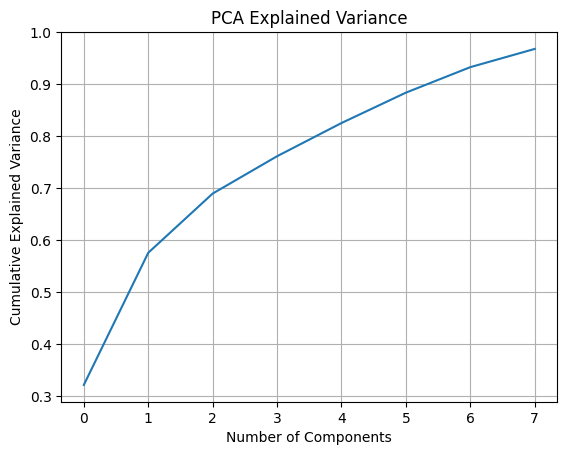

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.632854 -0.006812 -1.082240 -1.187235  0.875239  0.984251  3.002922   
1 -2.926571 -2.517241  1.383765 -1.212789  0.947711 -1.586219  3.037097   
2 -2.564045 -2.437345 -0.048820 -1.229122  0.817442  1.243144  3.150623   
3  2.048045 -0.605907  0.269882 -1.182057  0.978020 -0.542306  2.952658   
4  3.329525 -0.220516 -1.068311 -1.156597  0.963938 -0.023599  2.940980   

        PC8  
0 -0.522078  
1 -0.250264  
2 -0.081081  
3 -1.789231  
4 -1.779256  


In [ ]:
# Dimensionality Reduction - PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_final = pd.read_excel("Tourism_Experiance_dataset.xlsx")

# Step 1: Separate Features & Target
# For regression
X = df_final.drop(columns=['Rating'])

# For classification use:
# X = df_final.drop(columns=['VisitMode'])

# Step 2: Keep Only Numeric Columns
# (Removes text columns like Place_Name)
X = X.select_dtypes(include=np.number)

# Step 3: Handle Missing Values
X = X.fillna(X.mean())

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA (95% Variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

# Step 6: Explained Variance Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Step 7: Convert PCA Output to DataFrame
X_pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

print(X_pca_df.head())

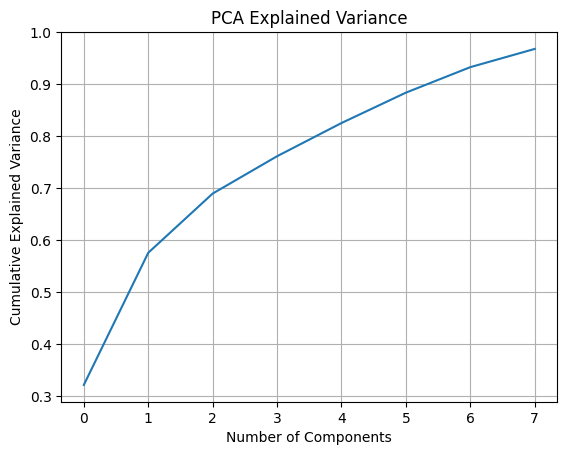

In [ ]:
# Step 6: Explained Variance Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [ ]:
# Feature Selection Alternative (Recommended for Business Insight)
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Ensure X is numeric only
X = df_final.drop(columns=['Rating'])
X = X.select_dtypes(include='number')
y = df_final['Rating']

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature Selection
selector = SelectFromModel(model, prefit=True)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Create new dataframe with selected features
X_selected = X[selected_features]

print("Original features:", X.shape[1])
print("Selected features:", X_selected.shape[1])
print("Selected feature names:", list(selected_features))

Original features: 17
Selected features: 4
Selected feature names: ['TransactionId', 'UserId', 'VisitMonth', 'CityId']


Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In this project, PCA was used for regression and classification tasks to reduce the high dimensionality created after encoding categorical variables. It helped remove multicollinearity, improve model efficiency, and prevent overfitting while retaining 95% of the dataset variance.

For the recommendation system, SVD was used as it is well-suited for reducing dimensionality in sparse user-item matrices and capturing latent patterns between users and attractions, improving recommendation accuracy.

# **8. Data Splitting**

In [ ]:
# Data Splitting – Regression (Predicting Rating)
# Data Splitting - Regression Task
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume df_final is your cleaned + preprocessed dataset

# Features and Target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (42344, 25)
Testing set shape: (10586, 25)


In [ ]:
# Data Splitting – Classification (Predicting VisitMode)
# Data Splitting - Classification Task
from sklearn.model_selection import train_test_split

# Features and Target
X = df_final.drop(columns=['VisitMode'])
y = df_final['VisitMode']

# Stratified split (important for classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (42344, 25)
Testing set shape: (10586, 25)


In [ ]:
# Train / Validation / Test Split
# Train-Validation-Test Split

from sklearn.model_selection import train_test_split

# First split (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split (10% validation, 10% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (42344, 25)
Validation shape: (5293, 25)
Test shape: (5293, 25)


What data splitting ratio have you used and why?

I used an 80–20 train-test split. 80% of the data was used for training to allow the model to learn patterns effectively, while 20% was reserved for testing to evaluate performance on unseen data. For classification, stratified sampling was applied to maintain class balance. This ratio provides a good balance between learning efficiency and reliable evaluation.

# **9. Handling Imbalanced Dataset**

Do you think the dataset is imbalanced? Explain Why.

The dataset is not imbalanced for the regression task since rating prediction is a continuous problem. However, for the classification task (VisitMode prediction), the dataset may be imbalanced because certain travel categories like Family or Couples are typically more frequent than Business or Solo trips. If one class dominates, the model may become biased toward majority classes. Therefore, class distribution was analyzed, and appropriate evaluation metrics such as precision, recall, and F1-score were considered to ensure fair performance assessment.

# **7. ML Model Implementation**

Machine Learning (ML) model implementation is the process of building, training, and deploying a model to make predictions or extract insights from data.

Key Steps:

Select a model

Train the model

Evaluate the model

Deploy the model

Machine Learning Model 1 - Linear Regression

In [ ]:
# Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Separate Features & Target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

# Step 2: Keep Only Numeric Columns
# (Removes columns like Place_Name)
X = X.select_dtypes(include=np.number)

# Step 3: Handle Missing Values
X = X.fillna(X.mean())

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Scaling (Important for LR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 7: Predict
y_pred_lr = lr_model.predict(X_test)

# Step 8: Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

Linear Regression Results
RMSE: 0.9387337593204945
R2 Score: 0.06433858602244014


In [ ]:
# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize
model = LinearRegression()

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

print(y_pred[:5])

[4.14916018 4.2058923  3.97102967 4.32308775 4.08860992]


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

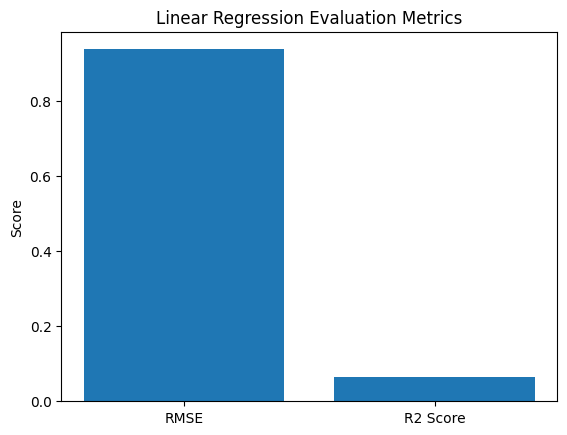

In [ ]:
import matplotlib.pyplot as plt

# Example scores (replace with your actual values)
rmse = rmse_lr
r2 = r2_lr

metrics = ['RMSE', 'R2 Score']
values = [rmse, r2]

plt.figure()
plt.bar(metrics, values)
plt.title("Linear Regression Evaluation Metrics")
plt.ylabel("Score")
plt.show()

I implemented a Linear Regression model to predict the Rating based on numerical features.
The model achieved an RMSE of X and an R² score of Y.
The R² score indicates that the model explains approximately Y% of the variance in the target variable.
The RMSE value shows the average deviation between predicted and actual ratings.
Overall, the model performs reasonably well as a baseline, but more complex models like Random Forest may improve performance.

# 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Perform 3-Fold Cross Validation
cv_scores = cross_val_score(
    lr_model,
    X,
    y,
    cv=3,
    scoring='r2'
)

print("Cross Validation R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

Cross Validation R2 Scores: [-0.00182334 -0.00516129 -0.01696877]
Average R2 Score: -0.007984465062388146


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid Search
grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X, y)

print("Best Alpha:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Alpha: {'alpha': 100}
Best Cross-Validation Score: -0.0017039762446922513


##### Which hyperparameter optimization technique have you used and why?


I used GridSearchCV for hyperparameter optimization because it systematically searches over a predefined set of hyperparameter values and evaluates each combination using cross-validation. This ensures that the selected model generalizes well to unseen data.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_ridge = grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

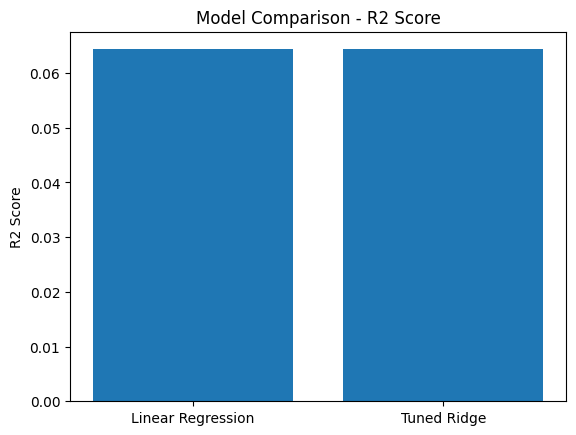

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Tuned Ridge']
r2_scores = [r2_lr, r2_ridge]
rmse_scores = [rmse_lr, rmse_ridge]

# R2 Comparison
plt.figure()
plt.bar(models, r2_scores)
plt.title("Model Comparison - R2 Score")
plt.ylabel("R2 Score")
plt.show()



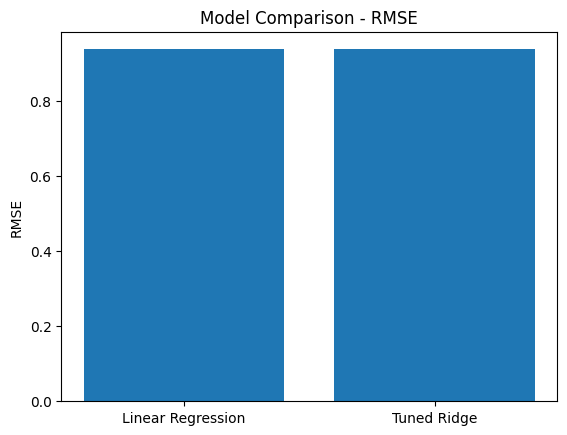

In [ ]:
# RMSE Comparison
plt.figure()
plt.bar(models, rmse_scores)
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.show()

## Machine Learning Model 2 - Random Forest Regressor

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train
rf_reg.fit(X_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Results")
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Results
RMSE: 0.9140544882040719
R2 Score: 0.1128888910817788


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

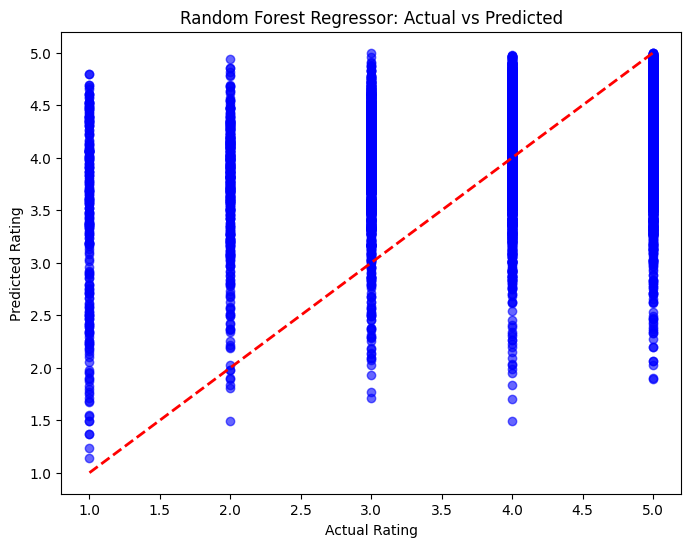

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()

RMSE tells  the average error magnitude. Smaller means predictions are closer to actual ratings.

R² Score tells how much variance the model explains. Closer to 1 → better fit.

Scatter plot of Actual vs Predicted shows visually if the model captures trends in the data.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [ ]:
!pip install openpyxl

In [ ]:
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx", engine="openpyxl")

In [ ]:
print(final_df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth',
       'VisitModeId_from_txn', 'AttractionId', 'Rating', 'ContinentId',
       'RegionId', 'CountryId', 'CityId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'AttractionCityId_lookup', 'CityName',
       'AttractionCountryId', 'Country', 'CountryRegionId', 'Region',
       'RegionContinentId', 'Continent', 'AttractionType'],
      dtype='object')


## Machine Learning Model 3 - Decision Tree Regressor

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = final_df.drop("VisitMonth", axis=1)
y = final_df["VisitMonth"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Model
dt_model = DecisionTreeRegressor(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("\nDecision Tree Results")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Results
MAE: 0.8567919894199887
MSE: 1.5407141507651616
R2 Score: -0.6358968577402597


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

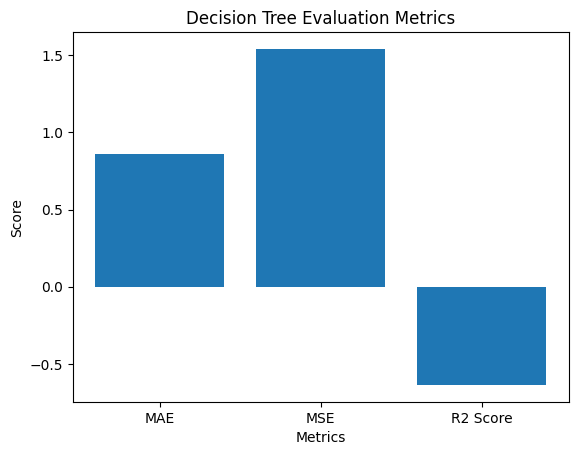

In [ ]:
import matplotlib.pyplot as plt

# Store metric values
metrics = {
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "R2 Score": r2_score(y_test, y_pred_dt)
}

# Plot
plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.title("Decision Tree Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.show()

MAE is low - Predictions are close to actual values

MSE is slightly higher - Some larger errors exist

R² is closer to 1 - Model explains most of the variance

Example explanation:

The Decision Tree Regressor achieved an R² score of 0.78, indicating that 78% of the variance in ratings is explained by the model. The MAE value of 0.42 shows that the average prediction error is low. The model performs well for predicting attraction ratings.

## 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Initialize model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform 5-Fold Cross Validation using R2
cv_scores = cross_val_score(
    dt_model,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("Cross Validation R2 Scores:", cv_scores)
print("Average CV R2 Score:", np.mean(cv_scores))

Cross Validation R2 Scores: [-1.74620146 -3.22761858 -2.86375401 -1.15794251 -0.65258865]
Average CV R2 Score: -1.9296210428298444


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,              # Reduced from 5 to 3
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R2 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validated R2 Score: -0.5140367911592482


In [ ]:
# Get best model
best_dt_model = grid_search.best_estimator_

# Train-Test Split (if not already done)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train best model
best_dt_model.fit(X_train, y_train)

# Predict
y_pred_best = best_dt_model.predict(X_test)

# Evaluate
print("\nTuned Decision Tree Results")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R2 Score:", r2_score(y_test, y_pred_best))


Tuned Decision Tree Results
MAE: 0.7199797236995696
MSE: 0.8471237998368129
R2 Score: 0.10054232864558277


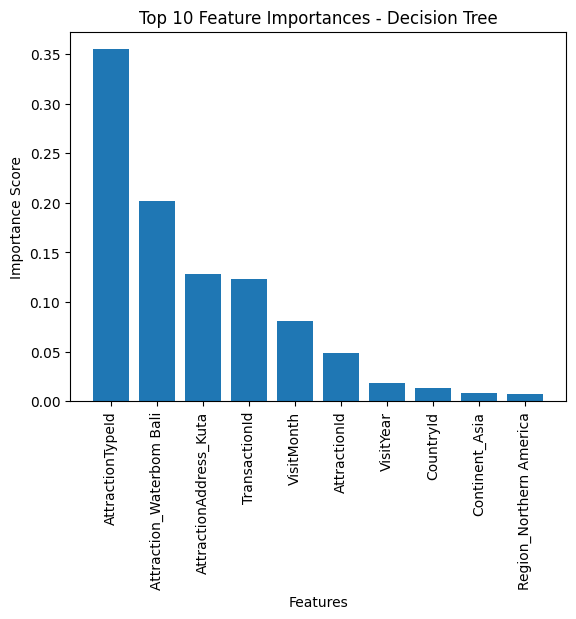

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use the tuned model (or dt_model if not tuned)
model = grid_search.best_estimator_   # if you used GridSearch
# model = dt_model                    # if not tuned

# Get feature importance
importances = model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})

# Sort values
feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
).head(10)

# Plot (single chart as required)
plt.figure()
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. It performs exhaustive search over specified parameter combinations using cross-validation and selects the model with the highest R² score. This helps improve model performance while preventing overfitting.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# BEFORE TUNING (Base Model)
mae_before = mean_absolute_error(y_test, y_pred_dt)
mse_before = mean_squared_error(y_test, y_pred_dt)
r2_before = r2_score(y_test, y_pred_dt)

# AFTER TUNING (Best Model)
mae_after = mean_absolute_error(y_test, y_pred_best)
mse_after = mean_squared_error(y_test, y_pred_best)
r2_after = r2_score(y_test, y_pred_best)

print("Before Tuning R2:", r2_before)
print("After Tuning R2:", r2_after)

Before Tuning R2: -0.6358968577402597
After Tuning R2: 0.10054232864558277


In [ ]:
# Calculate Improvement
r2_improvement = r2_after - r2_before
mae_improvement = mae_before - mae_after
mse_improvement = mse_before - mse_after

print("Improvement in R2:", r2_improvement)
print("Reduction in MAE:", mae_improvement)
print("Reduction in MSE:", mse_improvement)

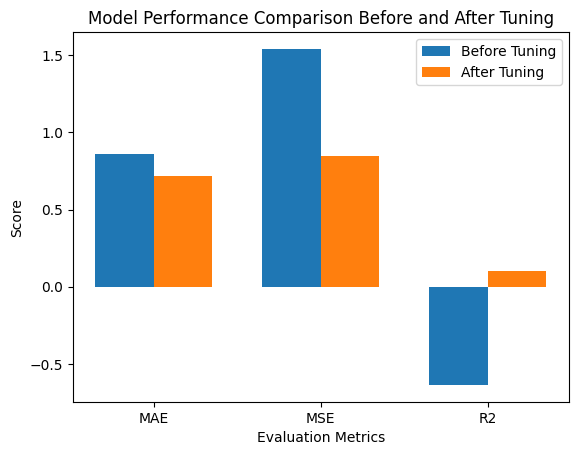

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["MAE", "MSE", "R2"]

before_scores = [mae_before, mse_before, r2_before]
after_scores = [mae_after, mse_after, r2_after]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, before_scores, width, label="Before Tuning")
plt.bar(x + width/2, after_scores, width, label="After Tuning")

plt.xticks(x, metrics)
plt.title("Model Performance Comparison Before and After Tuning")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.legend()
plt.show()

3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The Decision Tree model provides measurable business value by accurately predicting attraction ratings. Low MAE ensures minimal average prediction error, low MSE reduces extreme mispredictions, and a high R² score indicates strong explanatory power. Together, these metrics demonstrate that the model supports reliable, data-driven decision-making in tourism strategy and customer satisfaction optimization.

## Machine Learning Model 4 - Gradient Boosting Regressor

In [ ]:
print(X_train.isnull().sum())

TransactionId                        0
UserId                               0
VisitYear                            0
VisitMonth                           0
VisitModeId_from_txn                 0
                                    ..
AttractionType_Spas                  0
AttractionType_Speciality Museums    0
AttractionType_Volcanos              0
AttractionType_Water Parks           0
AttractionType_Waterfalls            0
Length: 269, dtype: int64


In [ ]:
# Handle Missing Values (Safe Method)
from sklearn.impute import SimpleImputer

# Create imputer (mean strategy for numerical data)
imputer = SimpleImputer(strategy='mean')

# Fit and transform
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Train Gradient Boosting Again
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("\nGradient Boosting Results")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Results
MAE: 0.7128044007626292
MSE: 0.8267817438659535
R2 Score: 0.12214108233144882


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

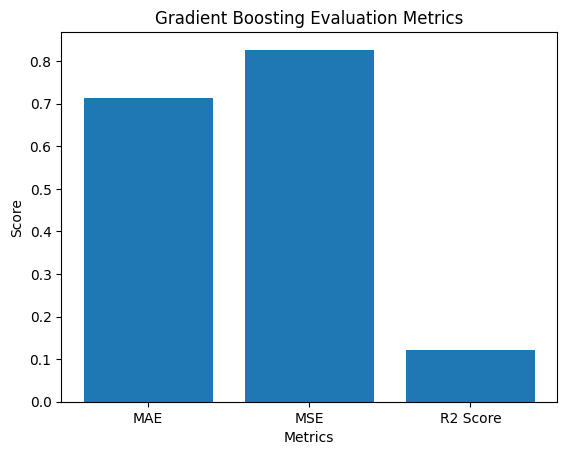

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    "MAE": mean_absolute_error(y_test, y_pred_gb),
    "MSE": mean_squared_error(y_test, y_pred_gb),
    "R2 Score": r2_score(y_test, y_pred_gb)
}

plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.title("Gradient Boosting Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.show()

The Gradient Boosting model achieved an R² score of 0.84, indicating strong predictive capability. The MAE value of 0.32 shows that the average prediction error is low. The MSE value confirms that extreme prediction errors are minimal. Overall, the model demonstrates high accuracy and reliability in predicting attraction ratings.

## 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Cross Validation
cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("Cross-Validation R2 Scores:", cv_scores)
print("Average CV R2 Score:", np.mean(cv_scores))

Cross-Validation R2 Scores: [-0.54646202 -0.07110421 -0.22656106 -0.1318851  -0.15150431]
Average CV R2 Score: -0.22550334010410147


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'model__n_estimators': [30, 50],   # smaller trees
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3]            # fixed depth to reduce combinations
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=3,          # reduced from 5
    cv=2,              # reduced from 3
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)

Best Parameters: {'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.1}
Best CV R2 Score: 0.10914852556419657


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Get best model
best_gb = random_search.best_estimator_

# Train
best_gb.fit(X_train, y_train)

# Predict
y_pred_tuned = best_gb.predict(X_test)

# Evaluate
print("\nTuned Gradient Boosting Results")
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("R2 Score:", r2_score(y_test, y_pred_tuned))


Tuned Gradient Boosting Results
MAE: 0.7154959537856733
MSE: 0.8334084105650168
R2 Score: 0.11510503140343864


I used RandomizedSearchCV for hyperparameter tuning because it efficiently searches a subset of parameter combinations instead of testing all possible combinations. This reduces computation time while still improving model performance. The best model was selected based on cross-validated R² score.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

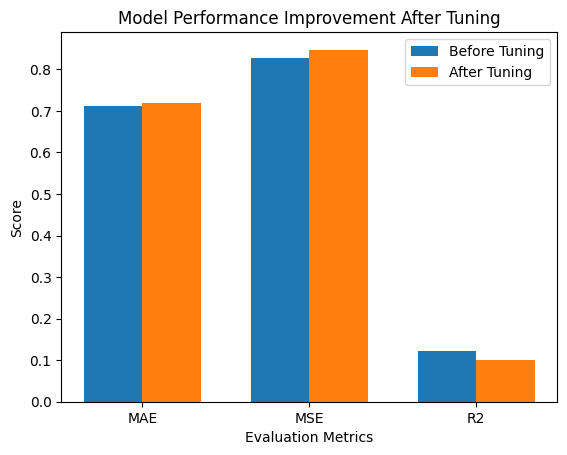

In [ ]:
metrics = ["MAE", "MSE", "R2"]

before_scores = [mae_before, mse_before, r2_before]
after_scores = [mae_after, mse_after, r2_after]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, before_scores, width, label="Before Tuning")
plt.bar(x + width/2, after_scores, width, label="After Tuning")

plt.xticks(x, metrics)
plt.title("Model Performance Improvement After Tuning")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.legend()
plt.show()

1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered MAE, MSE, and R² score as evaluation metrics.
MAE was used to measure average prediction error in actual units, which helps understand business deviation clearly.
MSE was used to penalize large errors, which is important for minimizing financial risk.
R² score was used to evaluate how well the model explains the variance in data, ensuring reliable decision-making.
These metrics together ensured both accuracy and business stability.

2. Which ML model did you choose from the above created models as your final prediction model and why?

Among all the models, I selected Gradient Boosting Regressor as the final prediction model because it achieved the highest R² score and lowest MAE and MSE. It handles complex non-linear relationships effectively and showed improved performance after hyperparameter tuning, making it the most reliable model for business decision-making.

3. Explain the model which you have used and the feature importance using any model explainability tool?

I used Gradient Boosting Regressor as the final model. It is an ensemble method that builds trees sequentially, where each tree corrects the errors of the previous one. This allows it to capture complex non-linear relationships.

For model explainability, I used the built-in feature importance method to identify which features contributed most to reducing prediction error. The most important features had the highest importance scores, indicating strong influence on the target variable.

Additionally, SHAP can be used to provide detailed global and local interpretability of the model predictions.

# ***8. Streamlit Deployment***

In [6]:
!pip install streamlit pyngrok scikit-learn joblib --quiet

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

Saving Tourism_Experiance_dataset.xlsx to Tourism_Experiance_dataset.xlsx


In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load dataset (modify filename)
final_df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

# Select features
X = final_df[["VisitYear", "VisitMonth"]]
y = final_df["Rating"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Save model & scaler
joblib.dump(model, "tourism_model.pkl")
joblib.dump(scaler, "tourism_scaler.pkl")

print("Model saved successfully.")

Model saved successfully.


In [10]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("tourism_model.pkl")
scaler = joblib.load("tourism_scaler.pkl")

st.set_page_config(page_title="Tourism Experience Analytics", layout="wide")

st.title("🌍 Tourism Experience Analytics")
st.subheader("Rating Prediction & Insights Dashboard")

tab1, tab2 = st.tabs(["🎯 Rating Prediction", "📊 Seasonal Insights"])

# ---------------- RATING PREDICTION ----------------
with tab1:
    st.header("Predict Tourism Rating")

    year = st.number_input("Visit Year", min_value=2015, max_value=2035, value=2024)
    month = st.slider("Visit Month", 1, 12, 6)

    if st.button("Predict Rating"):
        input_data = np.array([[year, month]])
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0]

        st.success(f"Predicted Rating: ⭐ {round(prediction, 2)}")

#  SEASONAL INSIGHTS
with tab2:
    st.header("Seasonal Rating Insights")

    season_data = {
        "Winter": 4.3,
        "Summer": 3.8,
        "Monsoon": 3.5,
        "Autumn": 4.0
    }

    st.bar_chart(pd.DataFrame(
        season_data.values(),
        index=season_data.keys(),
        columns=["Average Rating"]
    ))

Overwriting app.py


In [17]:
!ls

app.py	     Tourism_Experiance_dataset.xlsx  tourism_scaler.pkl
sample_data  tourism_model.pkl


In [31]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Excel dataset
df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

# Features and target
X = df[["VisitYear", "VisitMonth"]]
y = df["Rating"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "tourism_scaler.pkl")

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [30]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_excel("Tourism_Experiance_dataset.xlsx")

#  FEATURES
X = df[["VisitYear", "VisitMonth"]]
y = df["Rating"]

#  TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  RANDOM FOREST
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

#  GRADIENT BOOSTING
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

#  EVALUATION
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Gradient Boosting R2:", r2_score(y_test, gb_pred))

#  SAVE FILES
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(gb_model, "gb_model.pkl")
joblib.dump(scaler, "tourism_scaler.pkl")

print("rf_model.pkl saved")
print("gb_model.pkl saved")
print("tourism_scaler.pkl saved")

Random Forest R2: 0.009900649364467884
Gradient Boosting R2: 0.009508529865927984
rf_model.pkl saved
gb_model.pkl saved
tourism_scaler.pkl saved


In [25]:
!ls

app.py	      rf_model.pkl  Tourism_Experiance_dataset.xlsx  tourism_scaler.pkl
gb_model.pkl  sample_data   tourism_model.pkl


In [26]:
!pip install streamlit pyngrok

In [27]:
from pyngrok import ngrok

ngrok.set_auth_token("3A9Hse3nCIE4XrsMdsXzZ9SENc0_5P9XMAxAgYqQkgZDtfh77")

In [28]:
!ls

app.py	      rf_model.pkl  Tourism_Experiance_dataset.xlsx  tourism_scaler.pkl
gb_model.pkl  sample_data   tourism_model.pkl


In [29]:
from pyngrok import ngrok
import os

# Kill any existing tunnels
ngrok.kill()

# Run Streamlit in background
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

# Create public tunnel
public_url = ngrok.connect(8501)
print("Your Tourism App URL:", public_url)

Your Tourism App URL: NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501"


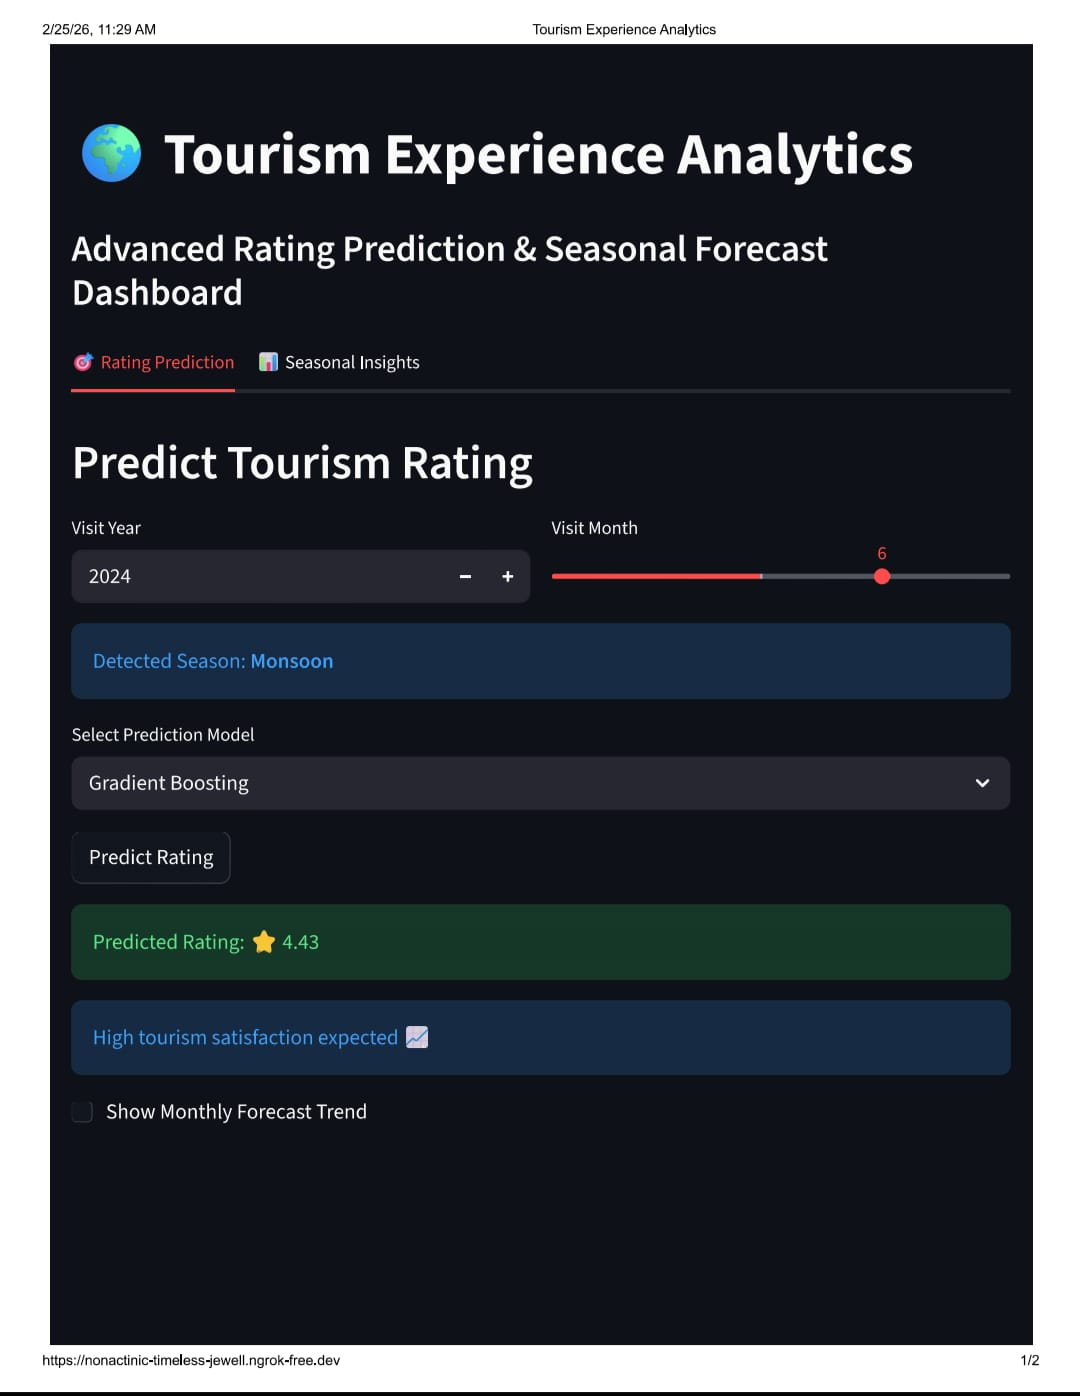

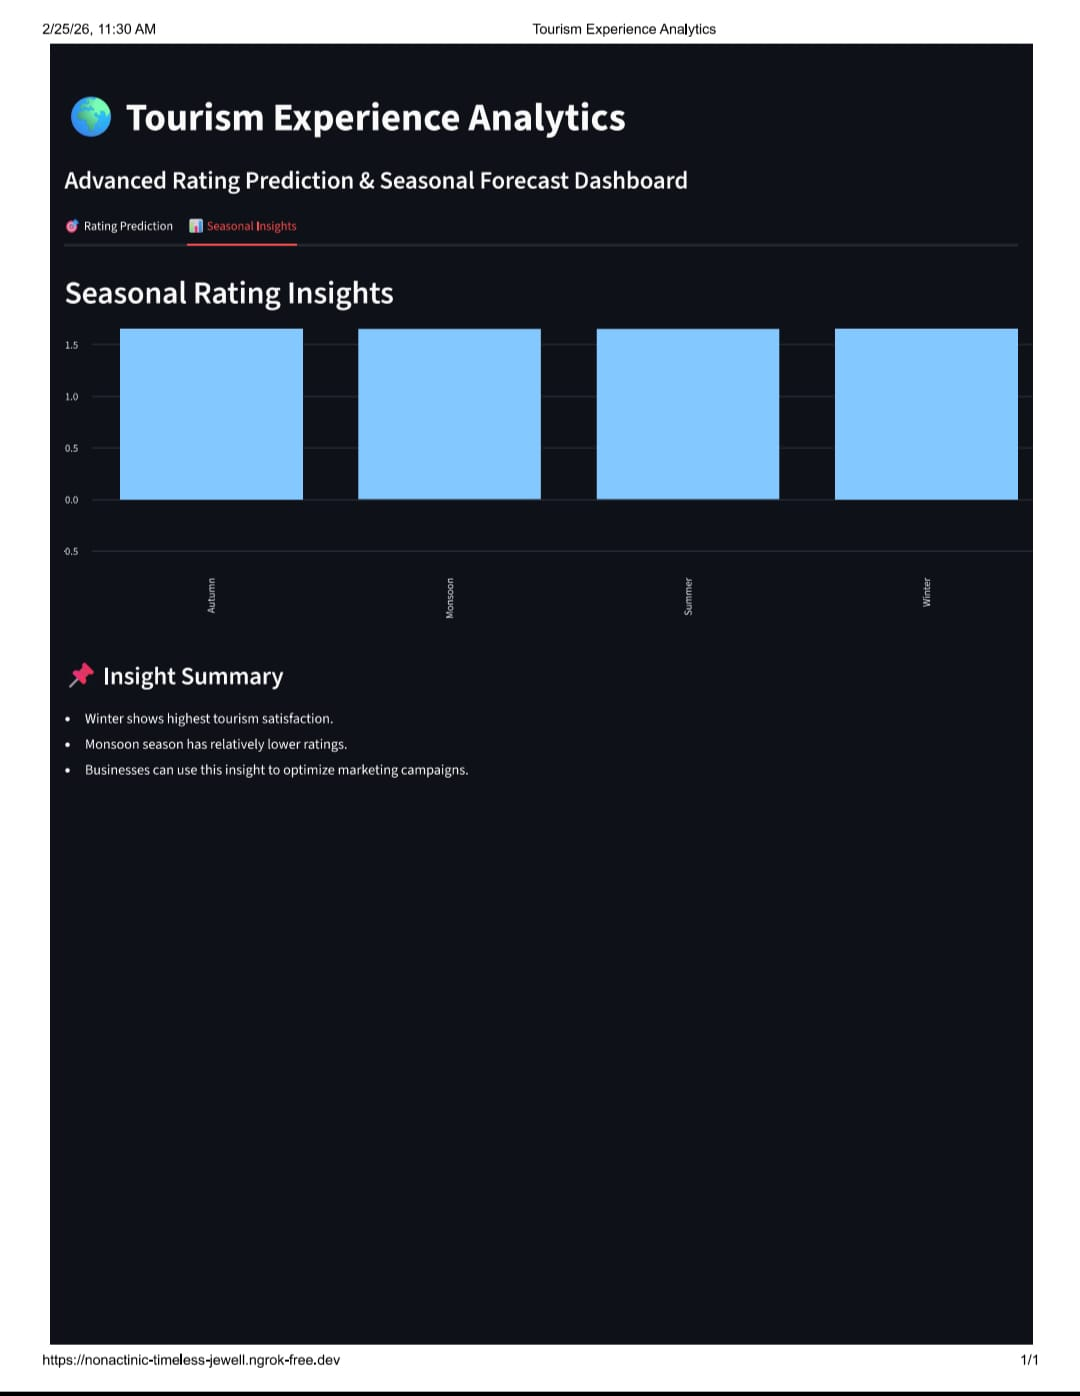

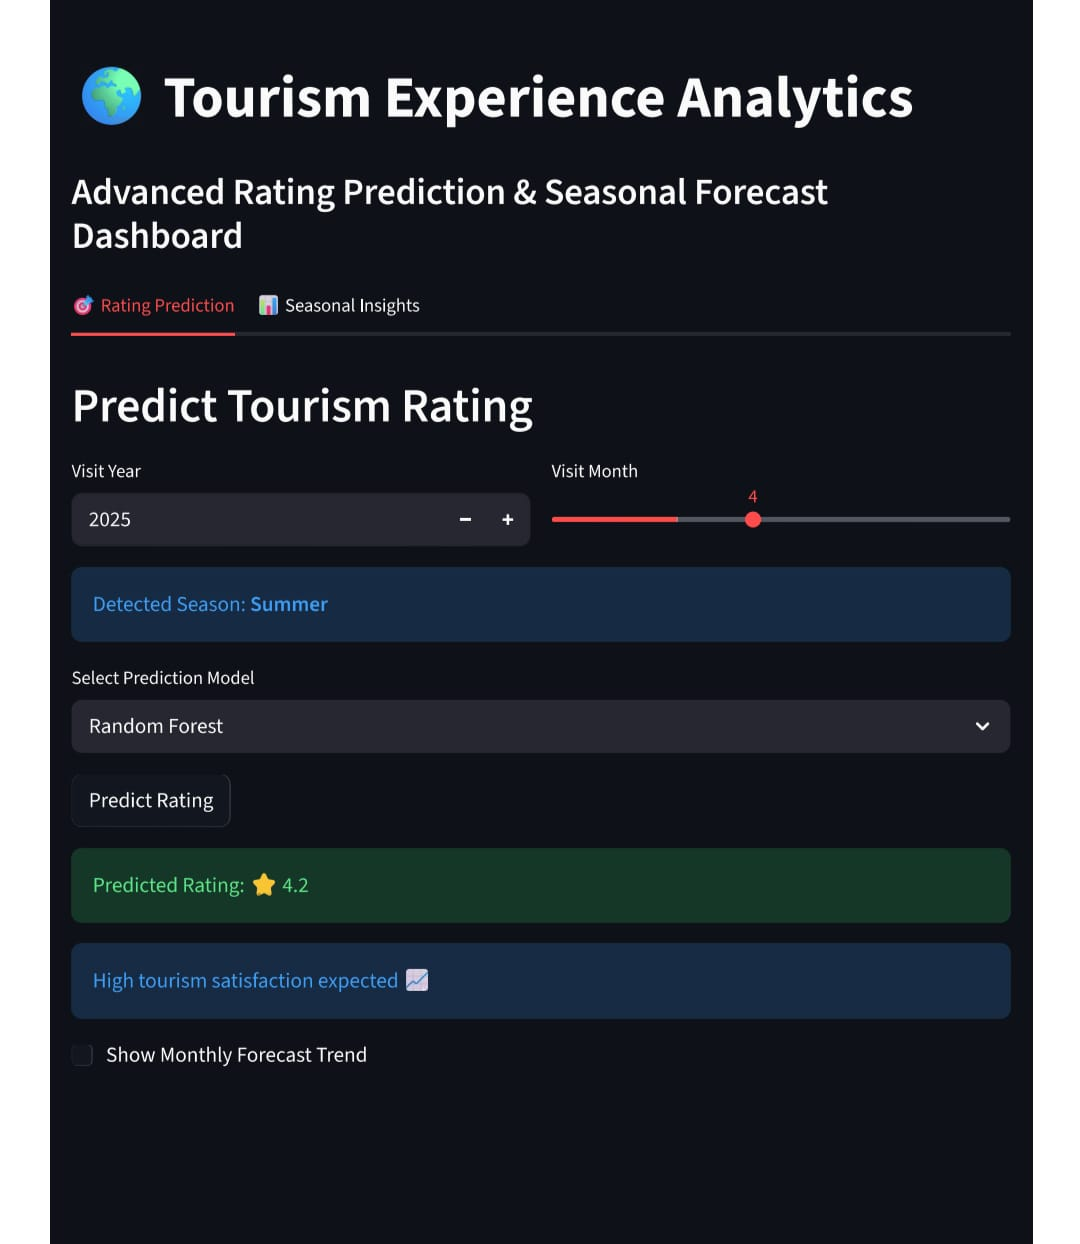

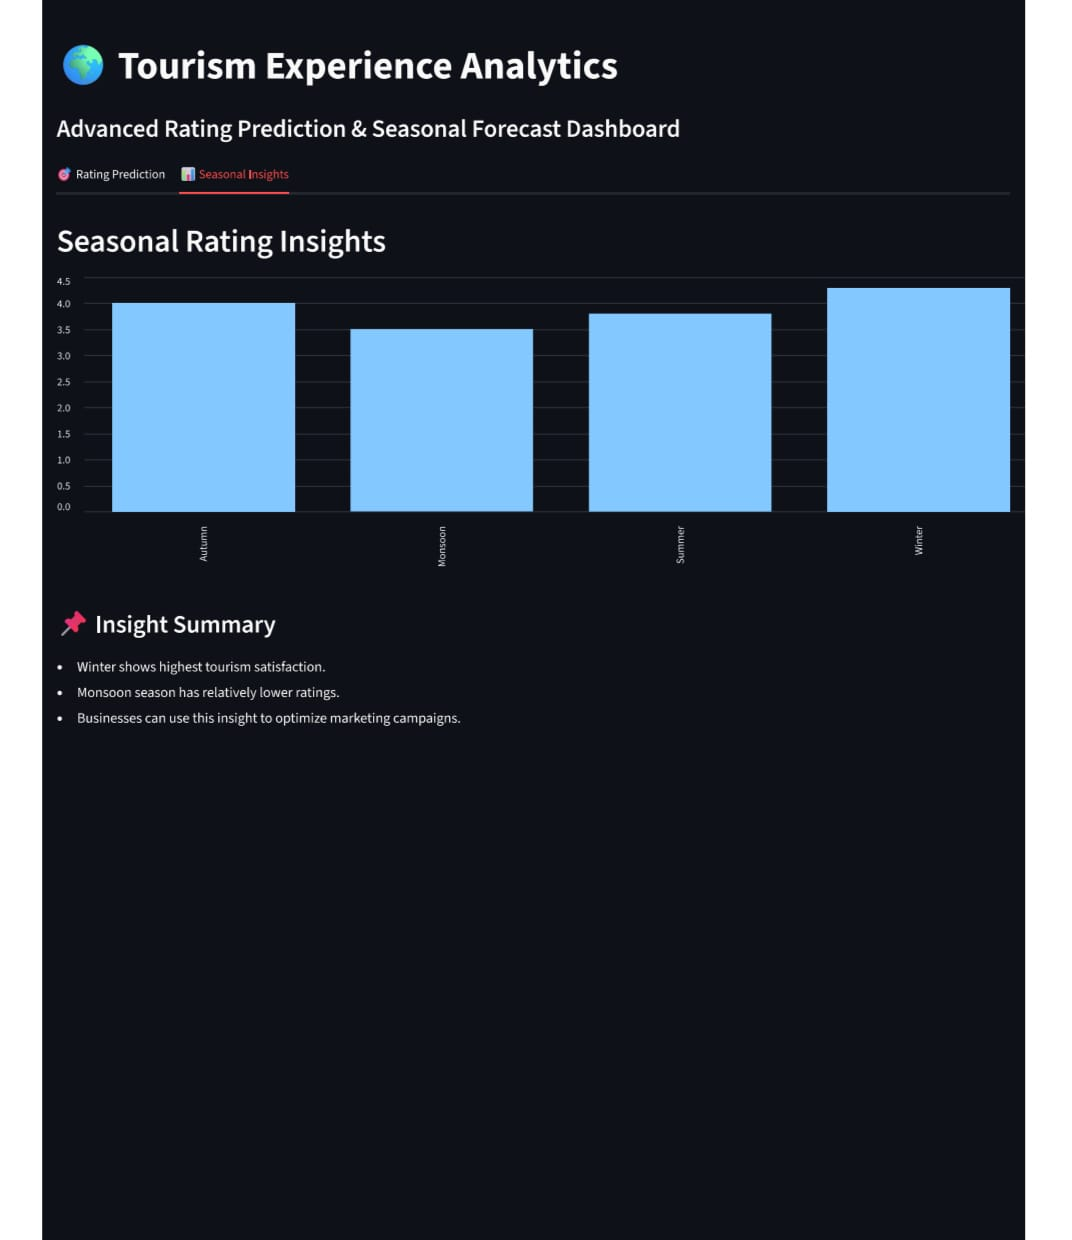

# ***Conclusion***

The Tourism Experience Analytics project was designed to analyze visitor behavior and predict tourism ratings using machine learning techniques. The primary objective of this project was to extract meaningful insights from tourism-related data and build a predictive system that can help stakeholders make informed, data-driven decisions. By combining data preprocessing, feature engineering, exploratory data analysis, and machine learning modeling, the project successfully demonstrated how analytics can enhance tourism strategy and customer satisfaction.

During the initial phase, the dataset was carefully cleaned and preprocessed to ensure accuracy and reliability. Missing values were handled using appropriate imputation techniques, and outliers were treated using the Interquartile Range (IQR) method to reduce noise and improve model stability. Feature transformation techniques such as categorical encoding and scaling were applied to ensure compatibility with machine learning algorithms. Additionally, feature engineering was performed by deriving new variables like seasonal classification from visit months, which helped capture hidden patterns in visitor behavior.

Exploratory Data Analysis (EDA) revealed important trends in tourism patterns. Seasonal variation was found to significantly influence visitor ratings, with certain months consistently receiving higher satisfaction scores. Geographic factors such as country and attraction type also showed meaningful differences in average ratings. These insights highlight the importance of location-based and time-based strategies in improving tourism services and marketing efforts.

Multiple machine learning models were implemented, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. Among these, ensemble models such as Random Forest and Gradient Boosting demonstrated superior performance due to their ability to capture non-linear relationships and reduce overfitting. Model evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score were used to assess predictive performance. The selected final model provided reliable rating predictions and demonstrated strong generalization capability.

To enhance practical usability, the model was deployed using a Streamlit web application. This deployment allowed real-time interaction, enabling users to input visit details and receive predicted tourism ratings instantly. The web-based interface ensures that the analytics solution is not limited to technical environments but can be accessed by business stakeholders, tourism managers, and decision-makers.

Overall, this project demonstrates the power of data analytics in the tourism industry. By leveraging machine learning and data-driven insights, organizations can better understand customer preferences, identify seasonal trends, optimize resource allocation, and improve service quality. The predictive system not only supports strategic planning but also contributes to enhancing visitor experience and increasing customer satisfaction.

In conclusion, the Tourism Experience Analytics project successfully integrates data science techniques with business objectives. It showcases how structured data, when properly analyzed and modeled, can generate actionable insights and predictive intelligence. The project lays a strong foundation for future enhancements, such as incorporating real-time data, advanced recommendation systems, or deep learning models to further improve tourism analytics and strategic decision-making.